<center><h1>Integrated Project I<br><br>
Online Gaming store Analysis</h1></center>

<b>Description:</b>

You are an analyst of the online gaming store "ICE" that sells video games to consumers around the world. in our website you can find the game you looking for by reviews , genres , platforms etc'. We also have data on games sales from diffrent sources.

You been request by your employer to identify if there is any patterns that can determine which video game is Success or not. so we can spot a potential big sales that Worth advertising campaign. 

in front of you all the data from the past year (2016), so you can decide on planning a campaign for 2017. (The dataset contains the abbreviation * ESRB)

\* Entertainment Software Rating Board
evaluates a game's content and assigns an age rating such as Teen or Mature.

- predicted a video gaming success or not by identify patterns if exist

- Spot potential winners for the plan advertising campaigns in 2017

<div class="alert alert-block alert-info" style="margin-top: 20px"><b style="font-size: 17px;">index:</b>
    
<a href="#open_the_data">I - Open data and study the general info</a>
    
<a href="#data_preparation">II - Prepare the data</a>
    
<a href="#analyze_data">III - Analyze the data</a>
    
<a href="#test_hypothesis">VI - Test the hypothesis</a>
    
<a href="#general_conclusion">V - General conclusion</a>
</div>
<hr>

<br><b id="open_the_data" style="font-size: 25px;">I - Open data and study the general info:</b><br><br><i>Loading all the libraries: pandas,numpy,etc.</i>

In [1]:
# import pandas and numpy for data preprocessing and manipulation
import numpy as np , pandas as pd 
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

# matplotlib for visualization
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
%matplotlib inline

# seaborn for statistical data visualization
import seaborn as sns
sns.set_style("darkgrid")

# import the math and scipy packages for statistical analysis
import math as mt
from math import factorial
from scipy import stats as st


# tree map visualization
import squarify

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display_html
from itertools import chain,cycle

import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)

print('Project libraries has been successfully been imported!')

Project libraries has been successfully been imported!


In [2]:
# read the data
try:    
    video_games = pd.read_csv('/datasets/games.csv')    
except:  
    video_games = pd.read_csv('c:\\Users\\motit\\My P100 projects\games.csv')    
print('Data has been read correctly!')

Data has been read correctly!


<br><b style="font-size: 20px;">First look at our datasets:</b><br>(*Head*,*Tail*,*Info*,*Describe*,*Zeros*,*Nan*,*Shape*,*Duplicate*,*Dtype etc*')

In [3]:
# Checking 0's
def zero_check(df):
    for i in df:
        print(i,len(df[df[i]==0]))
        
# function to determine if columns in file have null values        
def get_percent_of_na(df, num):
    count = 0
    df = df.copy()
    s = (df.isna().sum() / df.shape[0])
    for column, percent in zip(s.index, s.values):
        num_of_nulls = df[column].isna().sum()
        if num_of_nulls == 0:
            continue
        else:
            count += 1
        print('{} has {} nulls, which is {:.{}%} percent of Nulls'.format(column, num_of_nulls, percent, num))
    if count != 0:
        print("\033[1m" + 'There are {} columns with NA.'.format(count) + "\033[0m")
    else:
        print()
        print("\033[1m" + 'There are no columns with NA.' + "\033[0m")       
        
# function to display general information about the dataset
def general_info(df):
    print("\033[1m" + "\033[0m")
    display(pd.concat([df.dtypes, df.count(),df.isna().sum(),df.isna().sum()/len(df)], keys=['type','count','na','na%'],
                      axis=1))
    print()
    print("\033[1m" + 'Head:')  
    display(df.head())
    print()
    print("\033[1m" + 'Tail:')
    display(df.tail())
    print()
    print("\033[1m" + 'Info:')
    print()
    display(df.info())
    print()
    print("\033[1m" + 'Describe:')
    print()
    display(df.describe())
    print()
    print("\033[1m" + 'Describe include: object :')
    print()
    display(df.describe(include='object'))
    print()
    print("\033[1m" + 'Describe include: all :')
    print()
    display(df.describe(include='all'))
    print()
    print("\033[1m" + 'nulls in the columns:')
    print()
    display(get_percent_of_na(df, 4))  # check this out
    print()
    print("\033[1m" + 'Zeros in the columns:') 
    print()
    display(zero_check(df))
    print()
    print("\033[1m" + 'Shape:', df.shape)
    print()
    print('Duplicated:',"\033[1m" + 'We have {} duplicated rows\n'.format(df.duplicated().sum()) + "\033[0m")
    print()
    print("\033[1m" + 'Dtypes:')  
    display(df.dtypes)
    print()

In [4]:
print('information about Our dataset:')
general_info(video_games)

information about Our dataset:



,type,count,na,na%
Name,object,16713,2,0.000120
Platform,object,16715,0,0.000000
Year_of_Release,float64,16446,269,0.016093
Genre,object,16713,2,0.000120
NA_sales,float64,16715,0,0.000000
EU_sales,float64,16715,0,0.000000
JP_sales,float64,16715,0,0.000000
Other_sales,float64,16715,0,0.000000
Critic_Score,float64,8137,8578,0.513192
User_Score,object,10014,6701,0.400897



Head:


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN



Tail:


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN



Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None


Describe:



,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000



Describe include: object :



,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990



Describe include: all :



,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
count,16713,16715,16446.000000,16713,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,10014,9949
unique,11559,31,NaN,12,NaN,NaN,NaN,NaN,NaN,96,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,NaN,NaN,NaN,NaN,tbd,E
freq,12,2161,NaN,3369,NaN,NaN,NaN,NaN,NaN,2424,3990
mean,NaN,NaN,2006.484616,NaN,0.263377,0.145060,0.077617,0.047342,68.967679,NaN,NaN
std,NaN,NaN,5.877050,NaN,0.813604,0.503339,0.308853,0.186731,13.938165,NaN,NaN
min,NaN,NaN,1980.000000,NaN,0.000000,0.000000,0.000000,0.000000,13.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,0.000000,0.000000,0.000000,0.000000,60.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,0.080000,0.020000,0.000000,0.010000,71.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,0.240000,0.110000,0.040000,0.030000,79.000000,NaN,NaN



nulls in the columns:

Name has 2 nulls, which is 0.0120% percent of Nulls
Year_of_Release has 269 nulls, which is 1.6093% percent of Nulls
Genre has 2 nulls, which is 0.0120% percent of Nulls
Critic_Score has 8578 nulls, which is 51.3192% percent of Nulls
User_Score has 6701 nulls, which is 40.0897% percent of Nulls
Rating has 6766 nulls, which is 40.4786% percent of Nulls
There are 6 columns with NA.


None


Zeros in the columns:

Name 0
Platform 0
Year_of_Release 0
Genre 0
NA_sales 4508
EU_sales 5870
JP_sales 10514
Other_sales 6601
Critic_Score 0
User_Score 0
Rating 0


None


Shape: (16715, 11)

Duplicated: We have 0 duplicated rows


Dtypes:


Name                object
Platform            object
Year_of_Release    float64
Genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
Other_sales        float64
Critic_Score       float64
User_Score          object
Rating              object
dtype: object

<br><b style="font-size: 17px;">The dataset contains the following columns:</b><br>

`Name` - Video game title

`Platform` - Pc, Xbox , PS etc'

`Year_of_Release` - release date

`Genre` - Racing , Shooter , Sport etc'

`NA_sales` (North American sales in USD million)

`EU_sales` (sales in Europe in USD million)

`JP_sales` (sales in Japan in USD million)

`Other_sales` (sales in other countries in USD million)

`Critic_Score` (maximum of 100)

`User_Score` (maximum of 10)

`Rating` (ESRB)

\* Data for 2016 may be incomplete.

<br><b style="font-size: 17px;">Need to lower case </b>
    
`Name` - lowercase

`platform` - lowercase 

`year_of_release` - lowercase 

`genre` - lowercase 

`na_sales`- lowercase 

`eu_sales`- lowercase 
       
`jp_sales`- lowercase 
      
`other_sales`- lowercase 

`critic_score`- lowercase 

`user_score`- lowercase 

`rating`- lowercase 

<br><b style="font-size: 17px;">Dtype issues:</b>
    
`Name` - convert to str

`platform` - convert to str

`year_of_release` - convert to int

`genre` - convert to str

`na_sales`- convert to float

`eu_sales`- convert to float
       
`jp_sales`- convert to float
      
`other_sales`- convert to float

`critic_score`- convert to int

`user_score`- convert to float

`rating`- convert to str

<br><b style="font-size: 17px;">Add Columns / Rename Columns:</b>

`Total_sales` - Sum the sales of all the regions

`Name` - change to `Title` which is they way video games experts call it 

<br><b style="font-size: 17px;">Missing values:</b>

`critic_score`: 8578 of 16715 entries

`rating`: 6766 of 16715 entries

`user_score`: 6701 of 16715 entries

`year_of_release`: 269 of 16715 entries

`name` (title) : 2 of 16715 entries

`genre`: 2 of 16715 entries

<br><b style="font-size: 20px;">change `name` column into `title`:</b><br>

In [5]:
#change 'name' column into 'title'
video_games.rename(columns = {'Name': 'Title'}, inplace = True, errors = 'raise')

In the professional world of video games, it is more correct to define the **name of the game** as a `title` and not as a `name`, this way i decied to change the column name.

<br><b style="font-size: 17px;">Intermediate conclusion:</b>

- After the first look at our dataset , we can say that from 11 orginal columns we have 6 that have missing value. `Name` with
<br><br>
  0.0120% null values, `Year_of_Release` with 1.6093% , `Genre` with 0.0120%, `Critic_Score` has 51.3192%, `User_Score` has 
<br><br>
  40.0897%, and `Rating` has 40.4786% of null values. 
<br><br>  
- also `Name` going to be `Title` and convert into str along side `Genre`, `Year_of_Release` into to int. `User_Score` is a to 

  int. One interesting thing that we note is that the missing values in the `Name` and `Genre` are both visible error in the

  data i.e., value for the "Name" and "Genre" are not available for that row. The `Year_of_release` is missing at random (MAR) 

  so we need to replace them as well.
<br><br>  
- `Critic_Score`, `User_Score`, and `Rating` are **missing not at random (MNAR)** i.e., if the `Critic_Score` is missing, then
<br><br>
   in most cases the `User_Score` and/or `Rating` will be missing as well.
<br><br>          
- This looks like there was no record for the `Critic_Score`, `User_Score`, and `Rating` in that row of the data.
<br><br>
- We change the `Name` column into `title` , since this is the professional term in the field of video games

<br><b id="data_preparation" style="font-size: 25px;">II - Prepare the data:</b><br>

<b style="font-size: 17px;">Lower Case Columns names:</b><br>

In [6]:
# lower case Column names and remove white spaces if exist
video_games.columns = video_games.columns.str.strip().str.lower()
video_games.columns

Index(['title', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<br><b style="font-size: 17px;">Processing Missing Values:</b><br>

In [7]:
# function to calculate the percentage of missing values
def missing_values_table(df):
    """
    This function calculates the percentage of
    missing values in the dataset
    """
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("We have " + str(df.shape[1]) + " columns in our dataset"      
        " in " + str(mis_val_table_ren_columns.shape[0]) + " of them we have missing values")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [8]:
# check missing data
missing_values_table(video_games)

We have 11 columns in our dataset in 6 of them we have missing values


,Missing Values,% of Total Values
critic_score,8578,51.3
rating,6766,40.5
user_score,6701,40.1
year_of_release,269,1.6
title,2,0.0
genre,2,0.0


<br><b style="font-size: 17px;">Dropping missing values in `title` and `genre` columns</b>

In [9]:
# drop 'NaNs' in name and genre column
video_games = video_games.dropna(subset=['title', 'genre']).reset_index(drop=True)

<br><b style="font-size: 17px;">Intermediate conclusion:</b>

**Highlights:**

- We lower case all the column names for uniform shape
<br><br> 
- We have a lots of missing values more then 50% in `critic_score` , more than 40% in `rating`and `user_score` and less than 2%   in `year_of_release`. 
<br><br>
- We choice to drop the 2 missing values each in the columns `title` and `genre` since to try to fix them make no sense and     this won't hurt our analysis in any dramatic way

<br><b style="font-size: 17px;">Processing `year_of_release` column:</b>

In [10]:
# fill the missing value with fillna mode 0
def fill_in_year_of_release(df):
    df['year_of_release'] = df['year_of_release'].fillna(df['year_of_release'].mode()[0])

In [11]:
# fill in missing values year_of_release
fill_in_year_of_release(video_games)

<br><b style="font-size: 17px;">Processing `critic_score` Column:</b>

In [12]:
    # Filling missing values with fillna and mean
def fill_in_critic_score(df):
        df['critic_score'].fillna((df['critic_score'].median()), inplace=True)  

In [13]:
# fill in missing values critic_score
fill_in_critic_score(video_games)

<br><b style="font-size: 17px;">Processing `user_score` Column:</b>

In [14]:
# replace tbd with nan
def fill_tbd_with_nan(df):     
    df['user_score'] = df['user_score'].replace('tbd', np.nan)

In [15]:
# Filling the Nan with median  
def fill_in_user_score(df):    
            df['user_score'].fillna((df['user_score'].median()), inplace=True) 

In [16]:
# Replace the 'tbd' with 'Nan'
fill_tbd_with_nan(video_games)

In [17]:
# # fill the Nan with user_score median
fill_in_user_score(video_games)

<br><b style="font-size: 17px;">Processing `rating` Column:</b>

**ESRB Rating line:**

**EC** - Early childhood, 3+ years<br/> 
**E** - Everyone, 6+ years<br/>
**E10+** - Every 10+ years<br/>
**T** - Teens, 13+ years<br/>
**M** - Mature teens, 17+ years<br/>
**AO** - Adults only 18+ years<br/>
**RP** - Rating pending<br/>

In [18]:
# fill the missing value of 'rating' column by the most common Rating by ESRB for this genre
video_games['rating'].mask(video_games['genre'] == 'Racing', 'E', inplace=True)
video_games['rating'].mask(video_games['genre'] == 'Platform', 'E', inplace=True)
video_games['rating'].mask(video_games['genre'] == 'Puzzle', 'E', inplace=True)
video_games['rating'].mask(video_games['genre'] == 'Role-Playing', 'E', inplace=True)
video_games['rating'].mask(video_games['genre'] == 'Sports', 'E', inplace=True)
video_games['rating'].mask(video_games['genre'] == 'Simulation', 'E', inplace=True)
video_games['rating'].mask(video_games['genre'] == 'Action', 'M', inplace=True)
video_games['rating'].mask(video_games['genre'] == 'Shooter', 'M', inplace=True)
video_games['rating'].mask(video_games['genre'] == 'Fighting', 'M', inplace=True)
video_games['rating'].mask(video_games['genre'] == 'Adventure', 'M', inplace=True)
video_games['rating'].mask(video_games['genre'] == 'Strategy', 'T', inplace=True)
video_games['rating'].mask(video_games['genre'] == 'Misc', 'E', inplace=True)

In [19]:
# view dataframe
display(video_games.head())

,title,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,71.0,7.5,E
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,E


In [20]:
# re-check for missing values in our data
missing_values_table(video_games)

We have 11 columns in our dataset in 0 of them we have missing values


,Missing Values,% of Total Values


<br><b style="font-size: 17px;">Intermediate conclusion:</b>
- Insted of drop the missing values of column `year_of_release` we use fillna with mode 0.
<br><br>
- To fill the missing values of `critical_score` we use fillna with median
<br><br>
- For the Tbd of `user_score` we replace it with nan and the nan fillna with median
<br><br>
- To fill the missing values of the column `year_of_release`, we need to get first the unique values of `title` this will help   us to get the `year_of_release` of this games. 
<br><br>
- for our `rating` missing values column , we used pandas mask `genre` and ESRB website to determine the `rating` label for       each game.

<br><b style="font-size: 17px;">Convert Datatypes</b>

In [21]:
# convert data to the correct data type
def convert_to_type(df, cols, type_val):
    for col in cols:
        df[col] = df[col].astype(type_val)

convert_to_type(video_games, ['title', 'platform', 'genre', 'rating'], str)
convert_to_type(video_games, ['year_of_release', 'critic_score'], 'int64')
convert_to_type(video_games, ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'user_score'], 'float64')   

In [22]:
# information about the dataset
video_games.info()
print('\nWe can see that our dataset is now with the correct dtypes')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
title              16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null int64
user_score         16713 non-null float64
rating             16713 non-null object
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB

We can see that our dataset is now with the correct dtypes


<br><b style="font-size: 17px;">Calculate the total sales</b>

In [23]:
# Total sales in all region
video_games['total_sales'] = video_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
video_games.loc[video_games['genre'] == 'Sports']
video_games.head()

,title,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80,7.7,E,22.70
15,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80,7.4,E,21.80
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
...,...,...,...,...,...,...,...,...,...,...,...,...
16674,G1 Jockey 4 2008,PS3,2008,Sports,0.00,0.00,0.00,0.00,71,7.5,E,0.00
16686,Outdoors Unleashed: Africa 3D,3DS,2011,Sports,0.01,0.00,0.00,0.00,71,7.5,E,0.01
16691,PGA European Tour,N64,2000,Sports,0.01,0.00,0.00,0.00,71,7.5,E,0.01
16698,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.00,71,7.5,E,0.01


,title,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71,7.5,E,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71,7.5,E,31.38


<br><b style="font-size: 17px;">Intermediate conclusion:</b>

**Highlights:**

- Lower case all the column names for uniform shape


- Filled in the missing values so now our dataset is ready for analysis


- Convert dtypes to the correct on (string, intger and float)


- Add new column `total_sales` (sum of all the regions sales)
<br><br>

We have been able to process the missing values in the `name`, `genre`, `year_of_release`, `user_score`, `rating`, 
<br><br> 
`critic_score` column. In the `name` and `genre` columns, we dropped the rows with missing values since the missing values are 
<br><br> 
less than 1%. In the `year_of_release`, `user_score`,`critic_score` columns, we fill in the missing values with the `median` or `mode` of the column. when in `rating` we used pandas mask on `genre` to fill the missing ESRB `rating` value.
<br><br> 
For the abbreviation of `tbd` was handled as an 'Nan' in the dataset. Now after re-inspecting our dataset, we can say that has 
<br><br> 
no missing values and is ready for analysis.

<br><b id="analyze_data" style="font-size: 25px;">III - Analyze the data:</b><br><br>
The below plot functions will be needed to plot and visualize the data<br>

In [24]:
# function to plot lollipop chart
def plot_lollipop(df, x, y, title, ylabel):
    fig, ax=plt.subplots(figsize=(12,6))
    ax.vlines(x = df[x], ymin=0, ymax = df[y], color='purple', alpha=0.5, 
              linewidth=2)
    ax.scatter(x = df[x], y= df[y], s= 75, color='blue', alpha=0.7)
    ax.set_title(title, fontdict={'size':12})
    ax.set_ylabel(ylabel, fontdict={'size':12})
    ax.set_xlabel(x, fontdict={'size':12})
    ax.set_xticks(df[x])
    ax.set_xticklabels(df[x], rotation=90, 
                       fontdict={'horizontalalignment':'right', 'size':10})    

In [25]:
# function to plot distribution chart with matplotlib
def plot_distribution(df, x, y, column ='', value='', func=np.sum):
    if column != '' and value != '':
        filter_df = df[df[column] == value]
        plot_df = filter_df.pivot_table(index=x, values=y, aggfunc=func)
        values_to_plot = plot_df[y].values
    else:
        plot_df = df.pivot_table(index=x, values=y, aggfunc=func)
        values_to_plot = plot_df[y].values
    xlabel = x.replace('_', ' ').capitalize()
    ylabel = str(y.replace('_', ' ').capitalize())
    title = str(value) + " - " + ylabel + " vs. " + xlabel
    ax = plot_df.plot(kind='bar', figsize=(12,6), rot=45, title=title, 
                      edgecolor='silver',legend=False)
    ax.set_ylabel(ylabel, fontsize = 10)
    ax.set_xlabel(xlabel, fontsize = 10)
    ax.set_title(title, fontdict={'size':12}, fontweight='bold')
    # place annotate on top of bars
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(), 2)),
                    (p.get_x() * 1.005, p.get_height() * 1.005),
                    fontweight='bold', color='dodgerblue', 
                    horizontalalignment='left', size=10)

In [26]:
# function to plot an ordered box plot using seaborn 
def plot_box(df, x, y, ylabel, title, func):
    xlabel = str(x.replace('_', ' ').capitalize())
    ylabel = ylabel
    plt.figure(figsize=(12,8))
    
    # create a grouped data
    grouped = df.groupby([x, 'year_of_release'])[y].agg(func).reset_index() 
    
    # specify func as `sum()` or `mean()` or `count()`
    # create an ordered list
    
    ordered = grouped.groupby([x])[y].agg(func).sort_values().reset_index()[x]
    
    # plot box plot
    sns.boxplot(x=x, y=y, data=grouped, order=ordered)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel);

In [27]:
# function to plot seaborn barplot
def plot_snsbar(df, x, y, title):
    xlabel = str(x.replace('_', ' ').capitalize())
    ylabel = str(y.replace('_', ' ').capitalize())
    
    # create grouped data
    data= df.groupby([x])[y].count().sort_values(ascending=False).reset_index()
    fig, ax=plt.subplots(figsize=(12,6))
    ax = sns.barplot(x = x, y = y, data=data)
    ax.set_title(title, fontdict={'size':12})
    ax.set_ylabel(ylabel, fontsize = 10)
    ax.set_xlabel(xlabel, fontsize = 10)
    ax.set_xticklabels(data[x], rotation=90);

<br><b style="font-size: 20px;">Look at how many games were released in different years, is the data for every period significant?</b><br>

In [28]:
# function to display tables side by side for analysis
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h6 style="text-align:center">{title}</h6>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

In [29]:
def decades(year):
    """
    Return a decade depending
    on year of release
    """
    try:
        if 1980 <= year < 1990:
            return '1980-1989'
        if 1990 <= year < 2000:
            return '1990-1999'
        if 2000 <= year < 2009:
            return '2000-2009'
        return '2010-2016'
    except:
        return year

In [30]:
# create a copy of dataframe
games_data = video_games.copy()
(games_data.rename(columns = {'year_of_release':'year of release','na_sales':'na sales','eu_sales':'eu sales',
                              'jp_sales':'jp sales','other_sales':'other sales','critic_score':'critic score',
                              'user_score': 'user score','total_sales': 'total sales'}, inplace = True, errors = 'raise'))

In [31]:
# apply the decades()
games_data['decade'] = games_data['year of release'].apply(decades)

In [32]:
# distribution of decades
games_data['decade'].value_counts()

2000-2009    8036
2010-2016    6703
1990-1999    1769
1980-1989     205
Name: decade, dtype: int64

In [33]:
# groupby year_of_release and count the games released
games_df = (games_data[['year of release','title']].groupby('year of release').agg('count').sort_values('year of release')\
            .reset_index())

In [34]:
display_side_by_side(games_df.head(), games_df.tail(), titles=['Total by year 80s','Total by year 00s'])

,year of release,title
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
,year of release,title
32,2012,653
33,2013,544
34,2014,581
35,2015,606


<br><b style="font-size: 17px;">Intermediate conclusion:</b>

We made new dataset "games_data" , to make some analysis on the games. we split the years to 'decades' and found the most release video games was in the 2000 and so on, when the less amount of release video games was in the 80s and it's understand since this was the beginning of what we called video games we know today.

<br><b style="font-size: 20px;">Game by year release:</b><br>

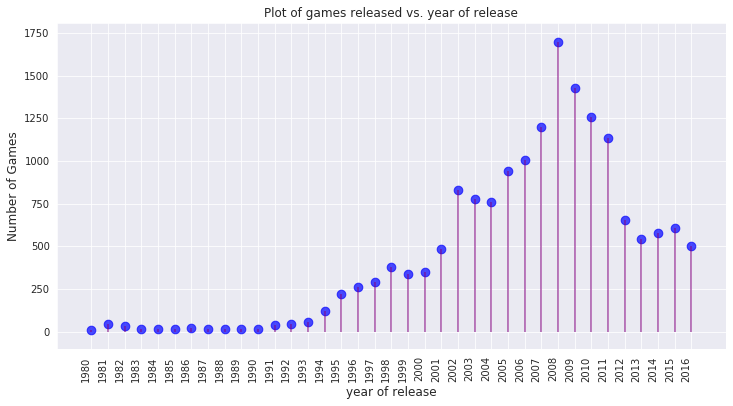

In [35]:
# plot of games by year of release
plot_lollipop(games_df, 'year of release', 'title', 'Plot of games released vs. year of release', 'Number of Games')

This lollipop plot show that our conclusion above was right and that most of the video games was release in 2000 and so on and it's make sense, since most significant changes in the gaming world start in the last decade, like global and online competitions, graphics-intensive consoles, realistic games, the worldwide web in every house, online games, live updates, more options to enjoy video games even in the small screen mobile, which bring the experience to new level.

compere to the 80s which Tv was very pricey no many option to play video games at home unless you can afford it, only rich people may have mobile phone that you can only call each other. computer wasn't in every home and if there was one the screen so in good cases no more the 4 colors was, so to experience the poor video games at the time was going to the mall to game centers. 

<br><b style="font-size: 20px;">Is the data for every period significant?</b><br>

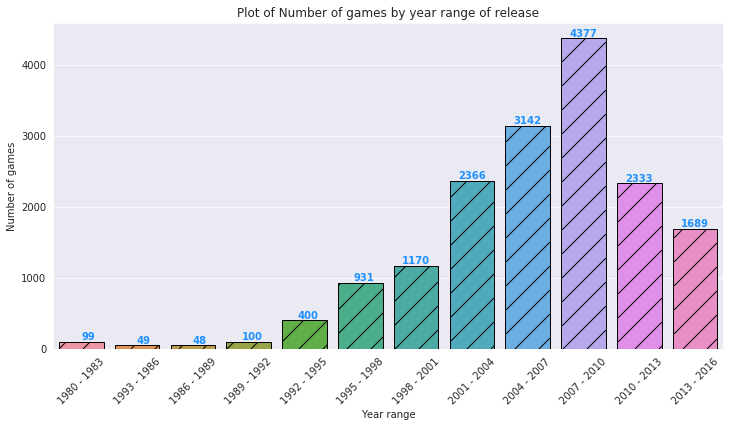

In [36]:
# plot of number of games by year range of release
bins = np.arange(games_data['year of release'].min(), games_data['year of release'].max()+1, 3)
bin_label = ['1980 - 1983', '1993 - 1986', '1986 - 1989', '1989 - 1992', '1992 - 1995', 
             '1995 - 1998','1998 - 2001','2001 - 2004', '2004 - 2007', '2007 - 2010', 
             '2010 - 2013', '2013 - 2016']
plot_bar = games_data.groupby(pd.cut(games_data['year of release'],
                                     bins=bins)).agg({'year of release': 'count'})\
.rename(columns={'year of release': 'Number of games'});
plot_bar['Year range'] = bin_label
fig, ax=plt.subplots(figsize=(12,6))
ax = sns.barplot(x='Year range', y= 'Number of games', 
                 data = plot_bar, edgecolor='black', hatch='/');
ax.set_title('Plot of Number of games by year range of release', fontdict={'size':12});
ax.set_xticklabels(bin_label, rotation=45);
for i, v in enumerate(plot_bar.iloc[:,0].values):
    ax.text(i + 0.25, v + 3, str(v), color='dodgerblue', fontweight='bold', 
            fontdict={'horizontalalignment':'right','verticalalignment':'bottom','size':10});
plt.show();

<br><b style="font-size: 17px;">Intermediate conclusion:</b>

From this lollipop plot, we can see that between 2005 - 2011 the most video games released. We group years by range and try to see how significant some years may be. We use cut to define the bins and divide the years in two groups of three year intervals. We observed from the bar plot that the data for the period 2000 - 2016. When the huge significant is in the years 2007 - 2010.

<br><b style="font-size: 20px;">Look at how sales varied from platform 2 platform:</b><br>

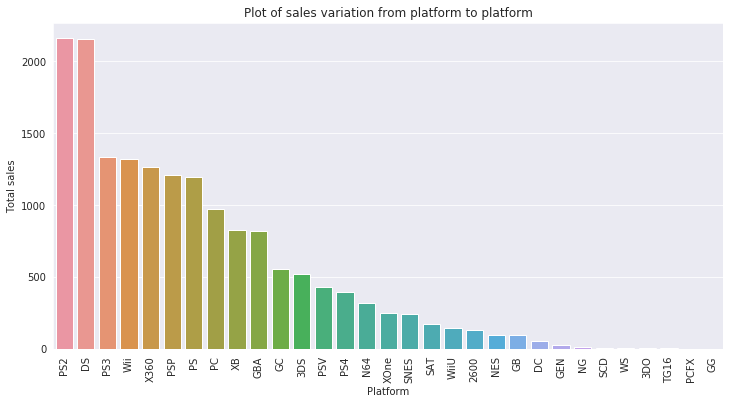

In [37]:
# plot of sales variation from platform to platform
plot_snsbar(games_data, 'platform', 'total sales', 'Plot of sales variation from platform to platform')

<br><b style="font-size: 17px;">Intermediate conclusion:</b>

The top five platforms was Sony PS2 and PS3, Nintendo DS and Wii, Microsoft Xbox 360 respectively. The platform with the least sales were Sega SCD and GG, Bandai WS, Panasonic 3DO, Nec TG16 and PCFX. We can plot a distribution of total sales against year of release across each platform. This will give us an idea of popular platform and the duration for new platform to appear.

<br><b style="font-size: 20px;">Choose the platforms with the greatest total sales and build a distribution based on data for each year</b><br>

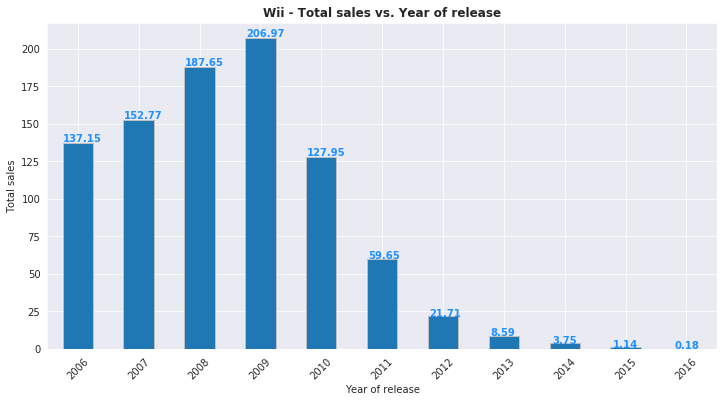

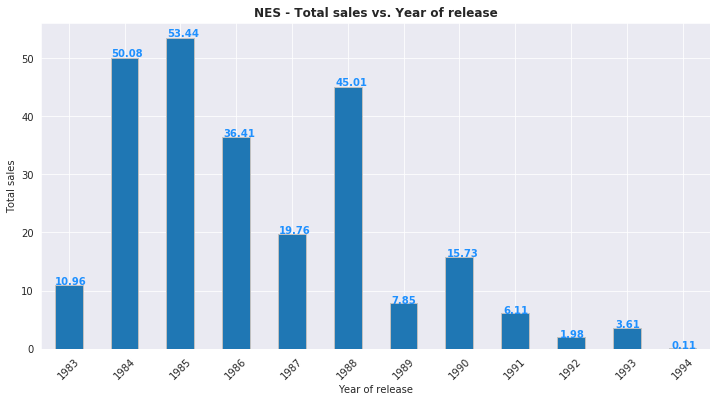

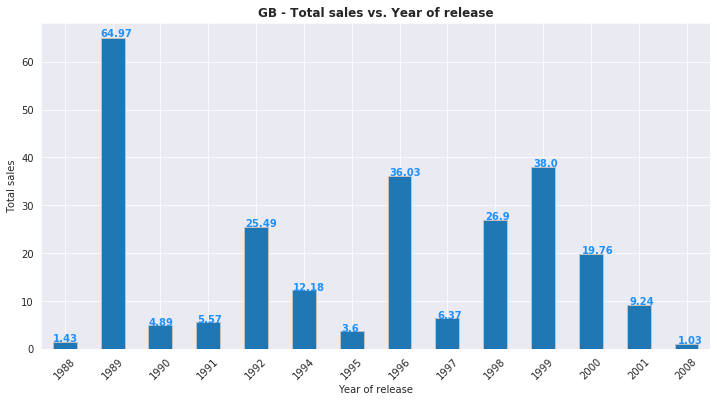

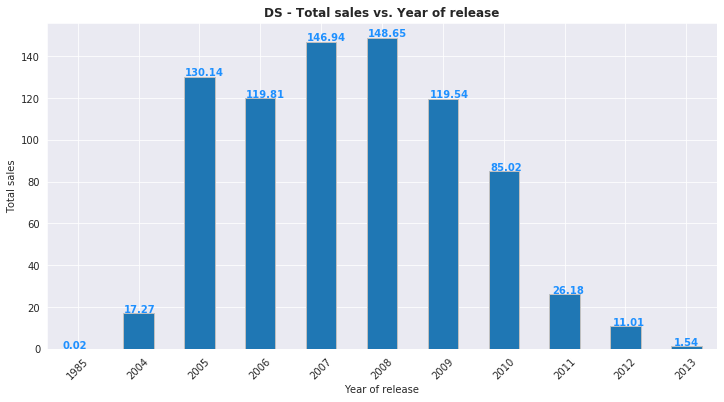

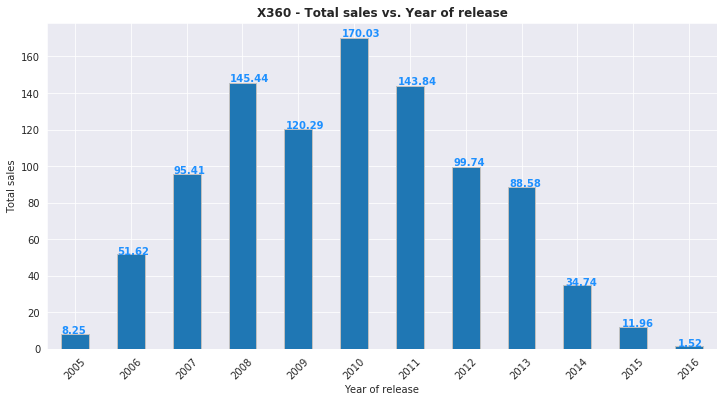

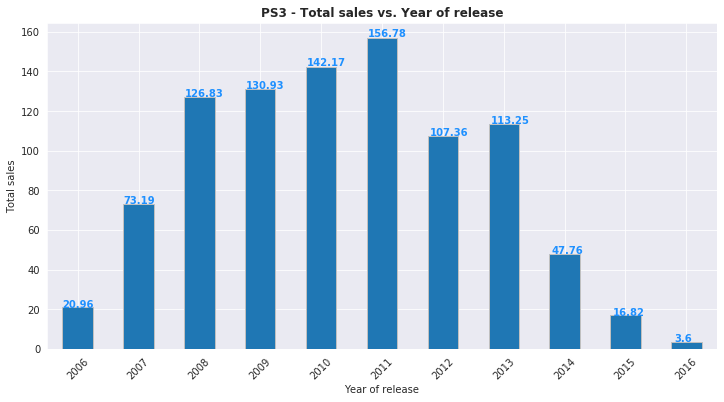

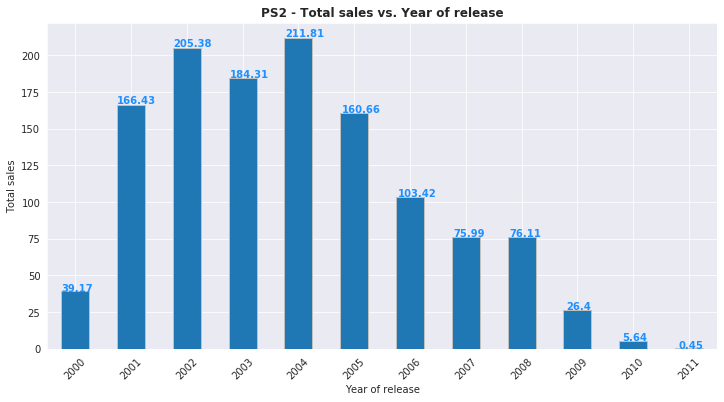

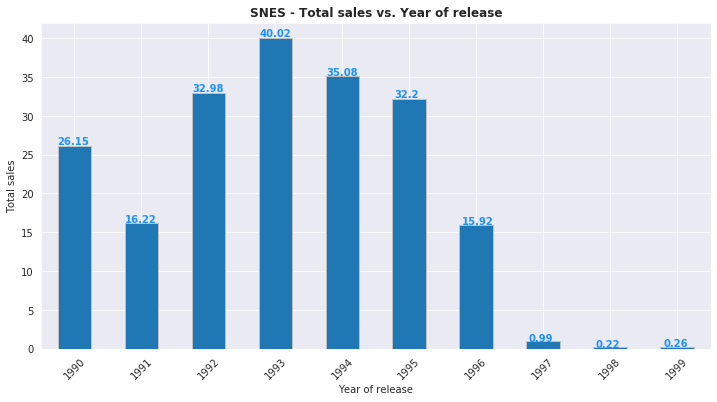

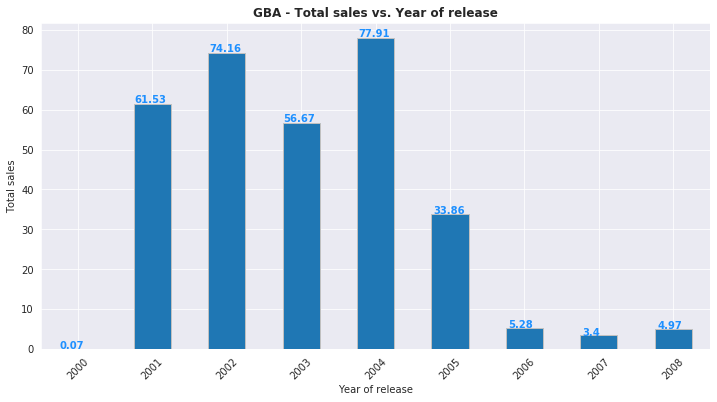

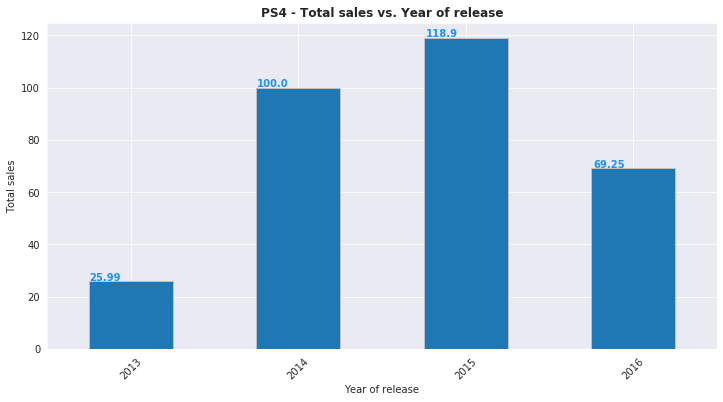

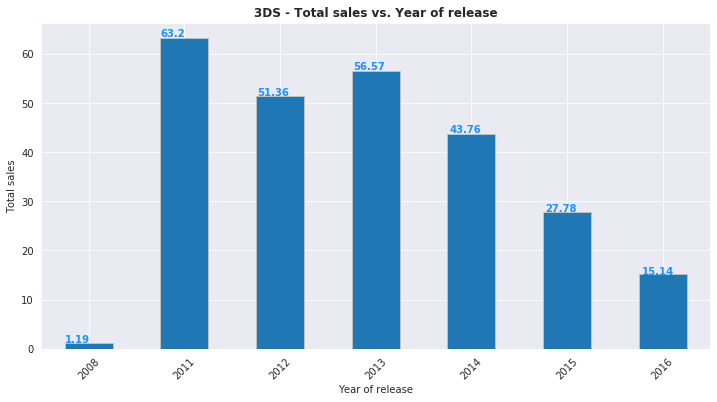

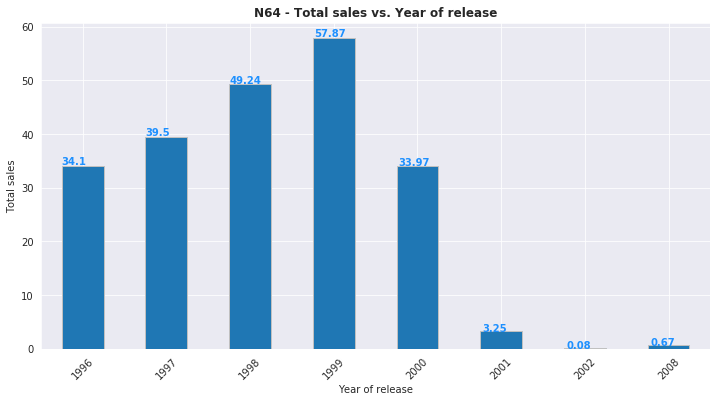

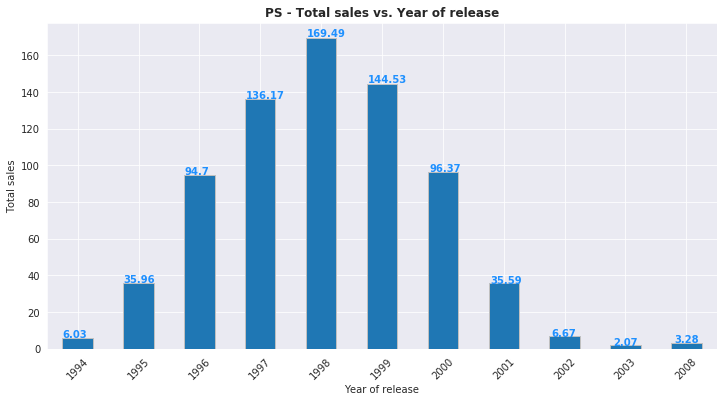

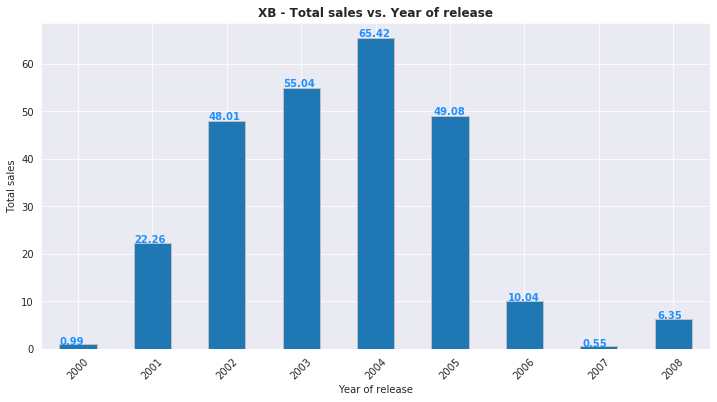

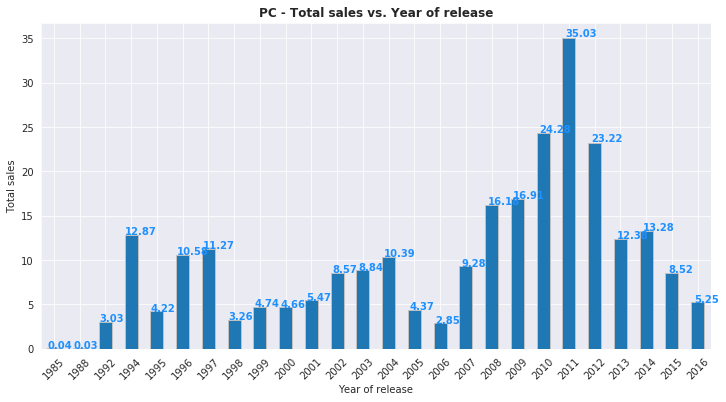

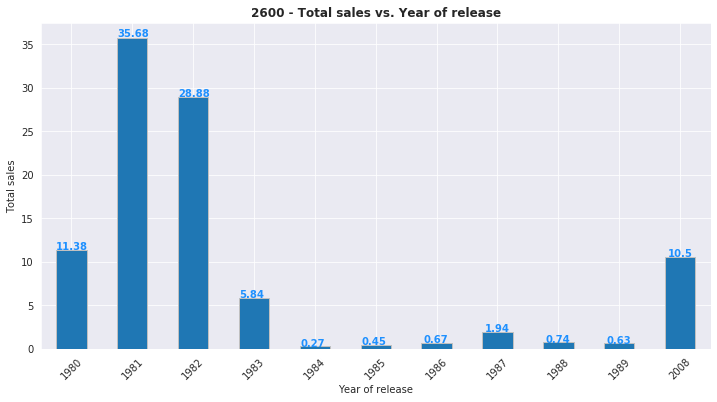

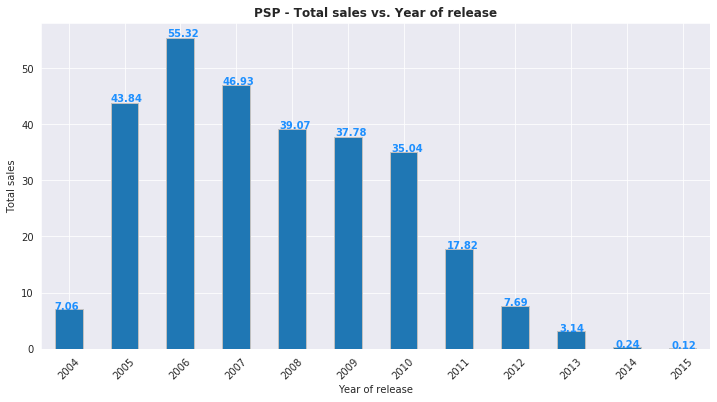

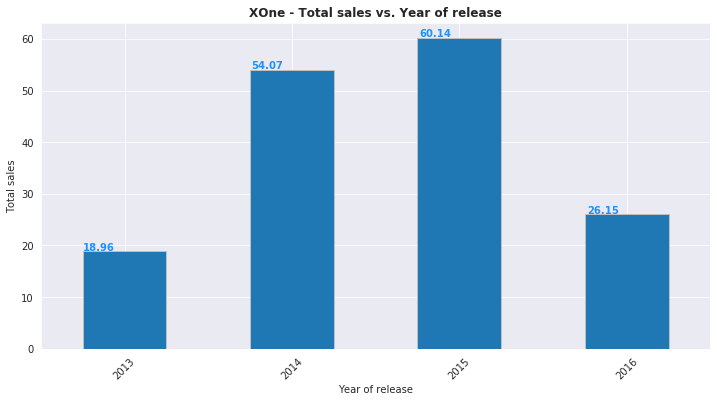

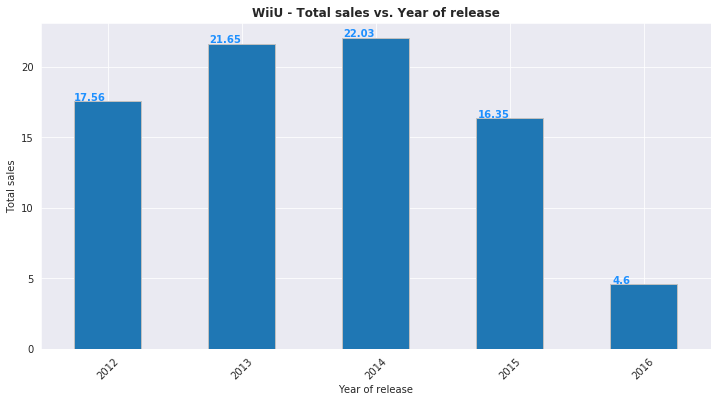

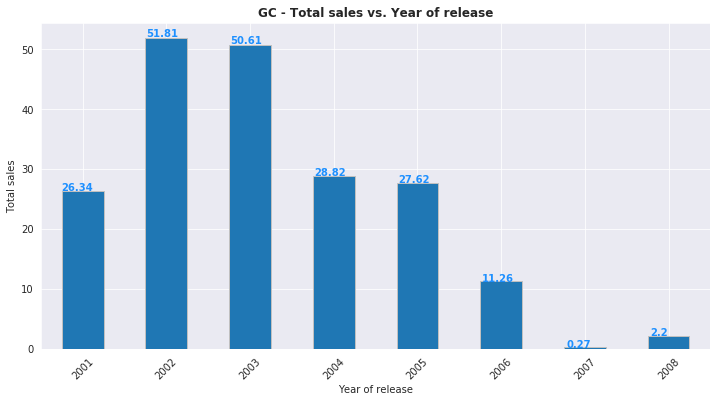

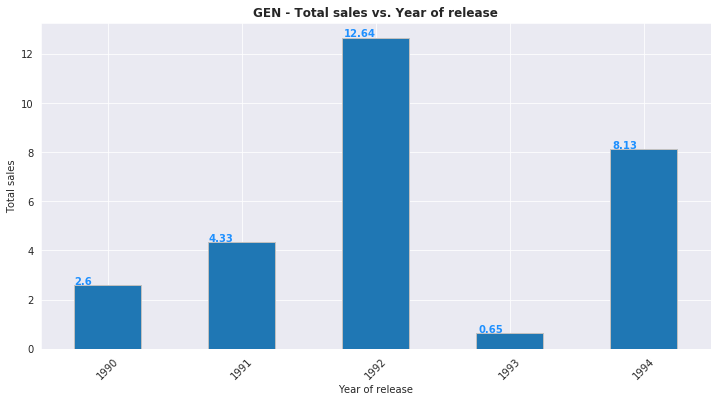

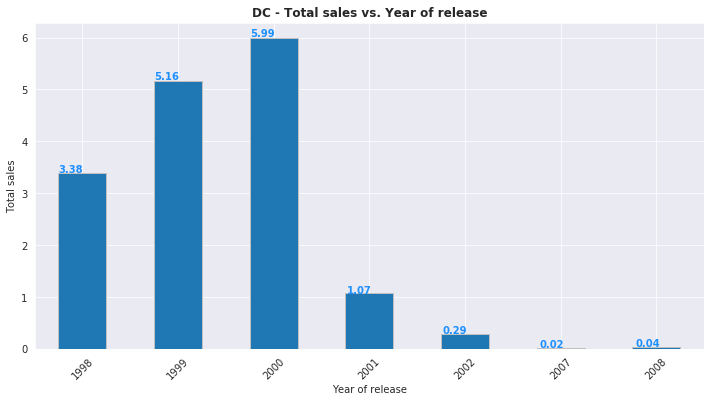

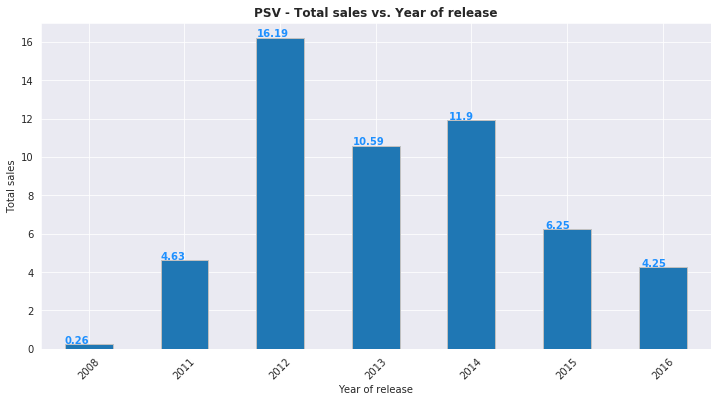

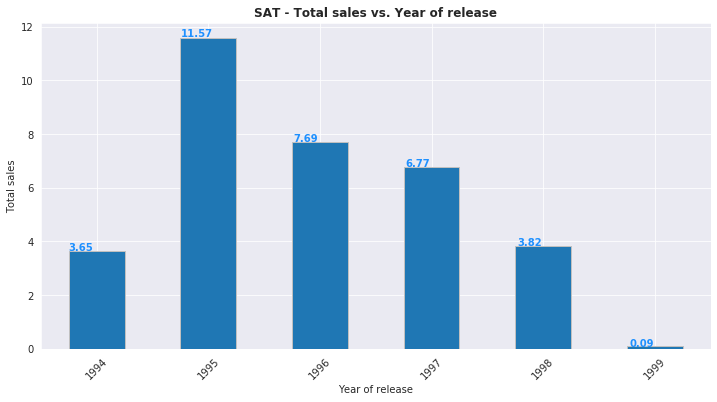

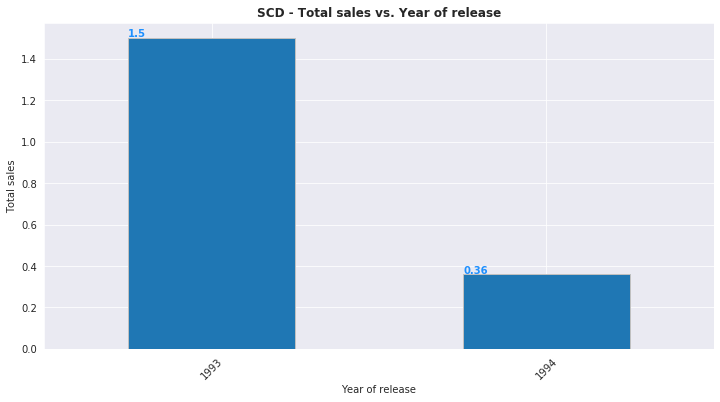

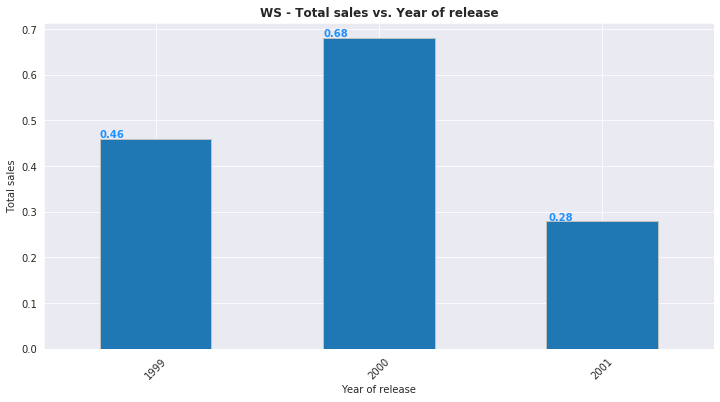

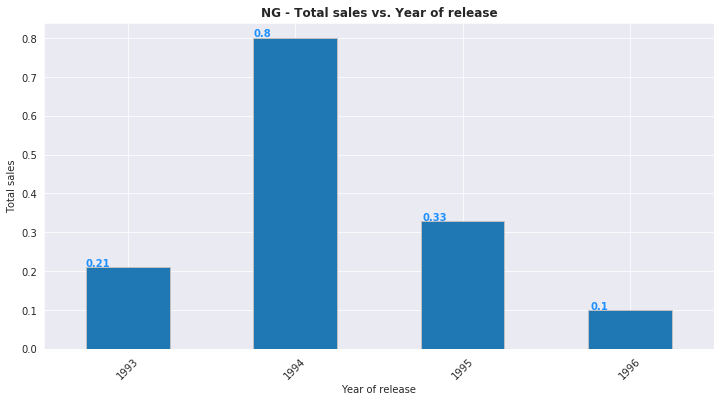

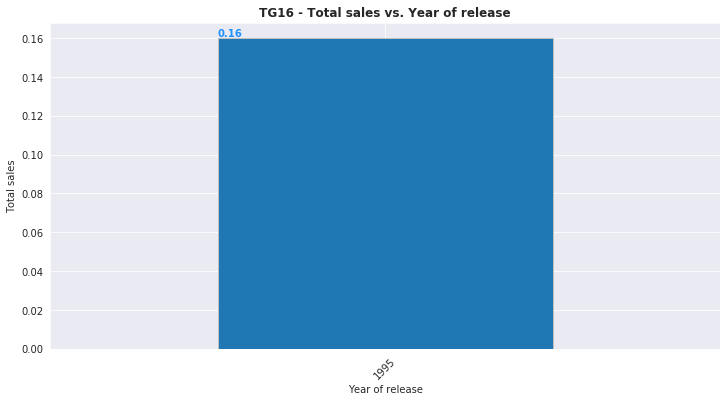

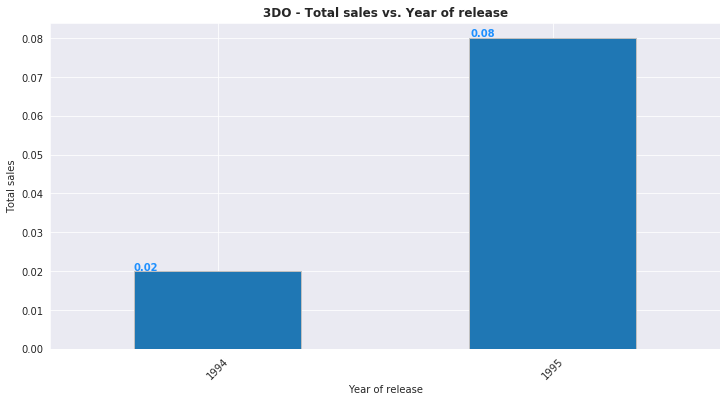

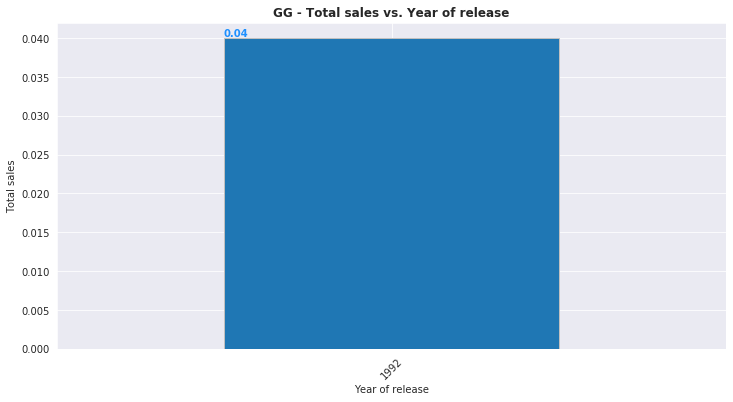

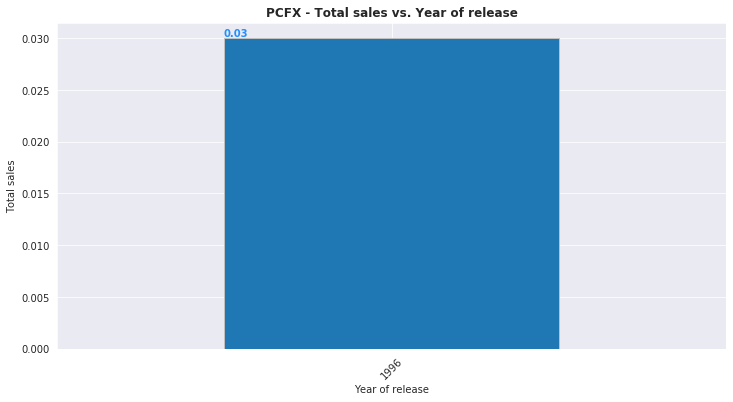

In [38]:
# distribution of total sales vs. year of release by each platform
for platform in video_games['platform'].unique(): plot_distribution(video_games, 'year_of_release','total_sales',
                                                                    'platform', platform) 

The chart above is the distribution of total sales against the year of release for each platform. From the chart we can observe that:

- `Wii` was popular between 2006 and 2011. It's popularity has reduced since it now have zero sales


- `DS` was popular between 2005 and 2010


- `X360` was popular between 2008 and 2011


- `PS3` was popular between 2008 and 2013. Sales dropped sharply in 2016, replace by the worldwide sale of the PS4 


- `PS2` was popular between 2001 and 2007. Sales started dropping after 2007 which coincided with the emergence of PS3. PS2 used to be popular but now have zero sales.


- `NES` used to be popular between 1984 and 1988. It now has zero sales. Similarly, `PSP` was popular between 2005 and 2010. it now has zero sales.


- `PC` had the highest sale in 2011. The PC is the platform with the longest lifespan among the other platform. The PC has been selling for about 30 years.  


- It generally takes about 6 years for new platforms to appear and old ones to fade.

<br><b style="font-size: 20px;">Platforms that used to be popular but now have zero sales</b><br><br>
<b style="font-size: 15px;">How long does it generally take for new platforms to appear and old ones to fade?</b>

We can visualize the platform that were popular but now have zero sales based on the Z-score. We calculate the Z-score and use a conditional approach to make sales Z-score values less than 0 to be *red*. Other sales Z-score values greater than 0 *green*. We then plot a divergent plot showing the platform performance against the Z-score. 

In [39]:
# group the total sales by platform with z-score and create different color for values less than zero
platform_df = video_games[['platform', 
                           'total_sales']].groupby('platform').sum().sort_values(by='total_sales').reset_index()
platform_df['sales_zscore'] = (platform_df['total_sales'] -\
                               platform_df['total_sales'].mean())/ platform_df['total_sales'].std()
platform_df['color'] = ['red' if x < 0 else 'green' for x in platform_df['sales_zscore']]
print('Z-Score total sales : Color Green: above Zero | Color Red : Less than a Zero')
display_side_by_side(platform_df.head(5), platform_df.tail(5), titles=['Z-Score platform sales head',
                                                                       'Z-Score platform sales tail'])

Z-Score total sales : Color Green: above Zero | Color Red : Less than a Zero


,platform,total_sales,sales_zscore,color
0,PCFX,0.03,-0.825614,red
1,GG,0.04,-0.825586,red
2,3DO,0.10,-0.825413,red
3,TG16,0.16,-0.825241,red
4,WS,1.42,-0.821623,red
,platform,total_sales,sales_zscore,color
26,DS,806.12,1.489273,green
27,Wii,907.51,1.780439,green
28,PS3,939.65,1.872737,green
29,X360,971.42,1.963972,green


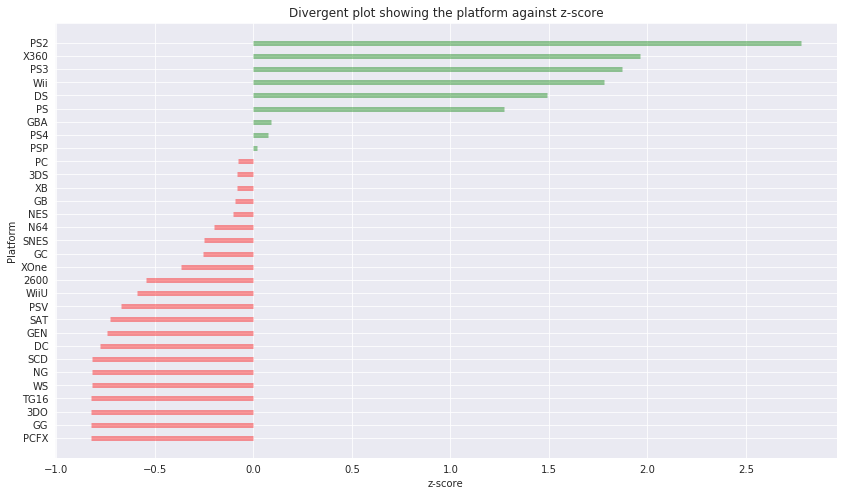

In [40]:
# divergent barplot showing the platform against z-score
plt.figure(figsize=(14, 8));
plt.hlines(y=platform_df.platform, xmin=0, xmax=platform_df.sales_zscore, color=platform_df.color, alpha=0.4, linewidth=5);
plt.xlabel('z-score');
plt.ylabel('Platform');

# displaying the title
plt.title('Divergent plot showing the platform against z-score');

Divergent plot above shows the different platform. The platform with 'green' bar light is the platform that is above the mean while the bars with 'red' bars light is the platform below the mean.

We can clearly see that `PS2`, `X360`, `PS3`, `Wii`, `DS` and `PS` are well above the mean. They are the leaders in term of total sales.

The `TG16`, `3DO`, `GG`, and `PCFX` are the worst platform in terms of total sales with values well below the mean of the data.

In [41]:
# group `platform` and `total sales` by `platform`
tree_df = video_games[['platform', 'total_sales']].groupby('platform').sum().reset_index()
tree_df = tree_df[tree_df['total_sales'] > 10]
display_side_by_side(tree_df.sort_values(by='total_sales',ascending=False).head(),
                     tree_df.sort_values(by='total_sales', ascending=True).head(),titles=['Top 5 by platform',
                                                                                          'Bottom 5 by platform'])

,platform,total_sales
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12
,platform,total_sales
3,DC,15.95
8,GEN,28.35
21,SAT,33.59
20,PSV,54.07


In [42]:
# create labels for our tree map
tree_size = tree_df['total_sales'].values.tolist()
labels = tree_df.apply(lambda x: str(x[0])+'\n'+'$'+str(round(x[1])), axis=1)
labels.head()

0    2600\n$97
2    3DS\n$259
3      DC\n$16
4     DS\n$806
5     GB\n$255
dtype: object

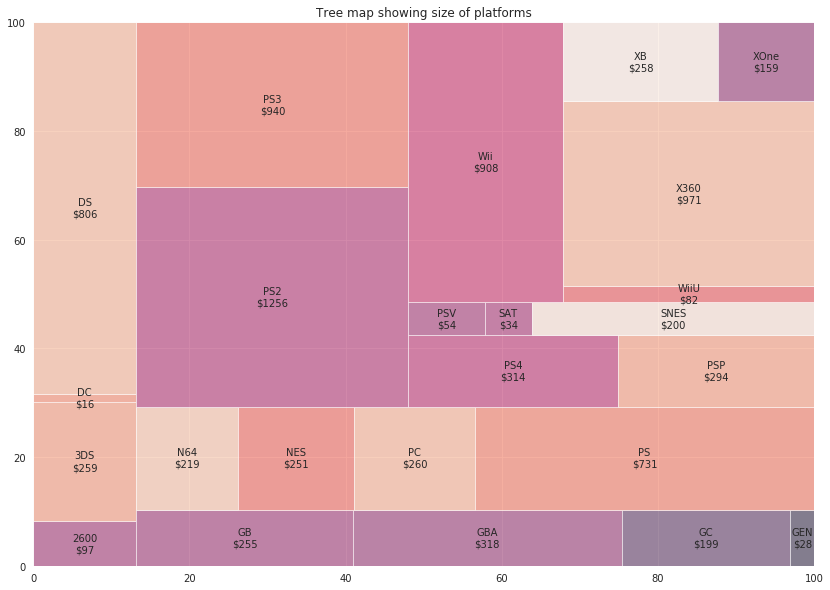

In [43]:
# tree map showing size of platforms
plt.figure(figsize=(14, 10))
plt.title('Tree map showing size of platforms')
squarify.plot(sizes=tree_size, label=labels, alpha=0.5)
plt.show();

Our Treemap defined the size of the tile, it's color and label. All the rectangles represents the scale of the platform leading or shrinking in sales. under each platform we have the sales values. bigger tile tells that our sales platform is growing when small one the upset shrinking in sales. 

This distribution of the market, we can see the leaders `PS2`, `PS3`, `Wii`, `DS` and `X360`. At a glance, we can tell which platform is profitable or not.

We can drill down our analysis by choosing year 2014 as the year that is relevant to our analysis and disregard platforms and sales before then.

In [44]:
# new dataframe for year we've decided to be relevant.
new_data_ = video_games[video_games.year_of_release > 2012]
new_data_ = new_data_.reset_index(drop=True, inplace=False)
shift_sales_df = pd.pivot_table(new_data_, index='year_of_release',columns= 'platform', values='total_sales', aggfunc=sum, 
                                fill_value=0)
shift_sales_df.head()

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,0.00,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,0.00,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


We can determine the shift in sales by finding the sum of the `total sales` across `platform` for each `year of release`. The shift in sales will tell us how our platform have faired in terms of sales from the year 2014 till recent.

In [45]:
# calculate shift
shift_sales_df.shift(+1).head()

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2015,43.76,0.00,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2016,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14


In [46]:
# calculate shift in sales
shift_in_sales = shift_sales_df - shift_sales_df.shift(+1)
shift_in_sales = shift_in_sales.dropna()
shift_in_sales.head()

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2014,-12.81,-1.54,0.90,-65.49,74.01,-2.90,1.31,-4.84,0.38,-53.84,35.11
2015,-15.98,0.00,-4.76,-30.94,18.90,-0.12,-5.65,-2.61,-5.68,-22.78,6.07
2016,-12.64,0.00,-3.27,-13.22,-49.65,-0.12,-2.00,-0.96,-11.75,-10.44,-33.99


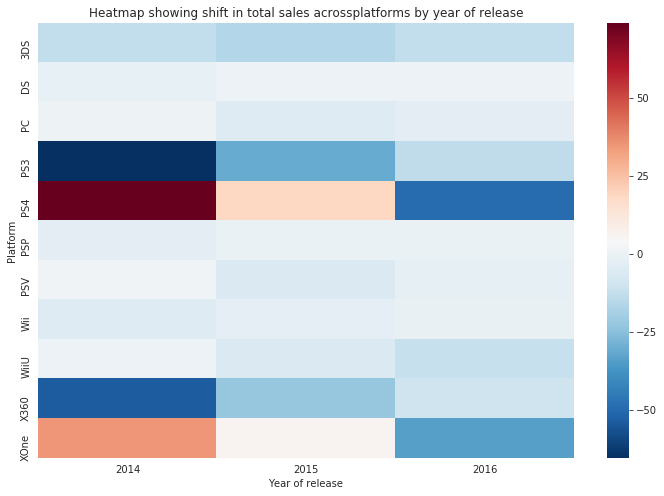

In [47]:
# plot heatmap using shift in sales data
plt.figure(figsize=(12,8))
sns.heatmap(shift_in_sales.T, cmap='RdBu_r')
plt.title('Heatmap showing shift in total sales across\
platforms by year of release')
plt.xlabel('Year of release')
plt.ylabel('Platform');

The heatmap above shows different platforms and the shift in sales across platforms. From the heatmap we can see that sales of the `PS4` and `XOne` was very successful in the year 2014.

<br><b style="font-size: 20px;">Build a box plot for the global sales of all games, broken down by platform</b><br>

In [48]:
# grouped data for total sales from year 2014
new_data = video_games[video_games.year_of_release > 2013]
new_data = new_data.reset_index(drop=True, inplace=False)
grouped = new_data.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()
grouped

,platform,year_of_release,total_sales
0,3DS,2014,43.76
1,3DS,2015,27.78
2,3DS,2016,15.14
3,PC,2014,13.28
4,PC,2015,8.52
5,PC,2016,5.25
6,PS3,2014,47.76
7,PS3,2015,16.82
8,PS3,2016,3.60
9,PS4,2014,100.00


In [49]:
# create an ordered list for our grouped data
ordered = grouped.groupby(['platform'])['total_sales'].sum().sort_values().reset_index()['platform']
ordered

0     PSP
1     Wii
2     PSV
3      PC
4    WiiU
5    X360
6     PS3
7     3DS
8    XOne
9     PS4
Name: platform, dtype: object

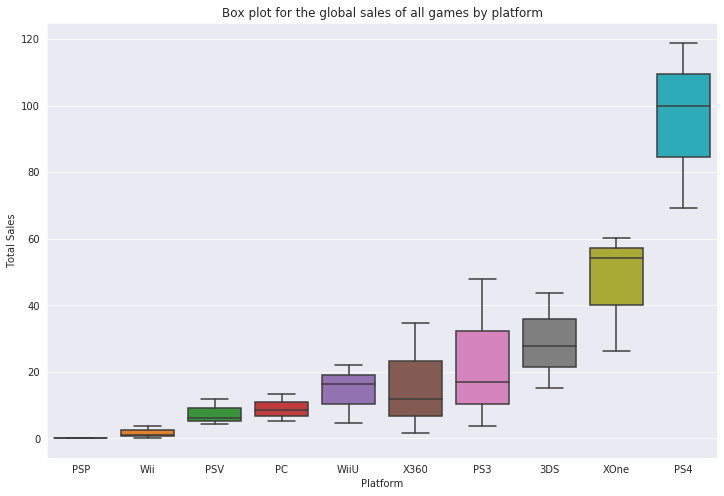

In [50]:
# Box plot for global sales of all games by platform
plt.figure(figsize=(12,8))
sns.boxplot(x='platform', y='total_sales', data=grouped, order=ordered)
plt.title('Box plot for the global sales of all games by platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales');

We can see in our boxplot that on top is the `PS4` which come out in late 2013 around the world, and gamers always prefer the best one, so of course this will be the hot cup cake in 2014 sales. There is no doubt that the Japanese console brand Sony is leading in that year's over the competition, even the previous generation `PS3` presents impressive competition.

This is definitely a hint as to which platform is the most successful of them all.

<br><b style="font-size: 20px;">What about average sales on various platforms?</b><br>

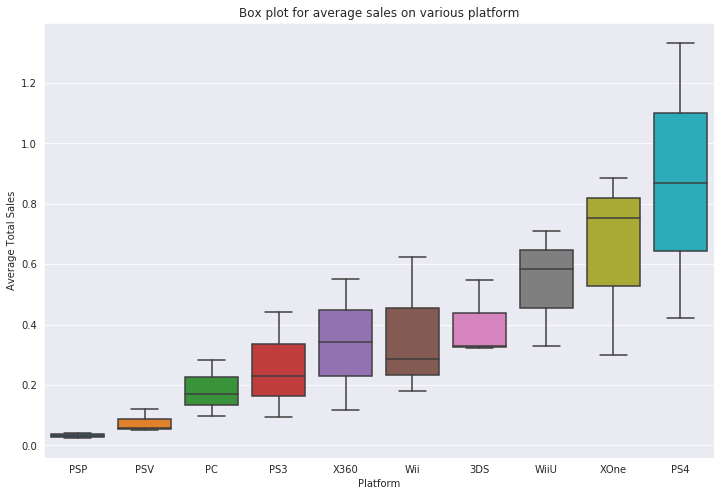

In [51]:
# box plot for average sales on various platform
plot_box(new_data,'platform','total_sales','Average Total Sales','Box plot for average sales on various platform', np.mean)

Like the previous boxplot we can see that `PS4` is also the lead in the average sales very close to it is the `Xone` from Microsoft.

Since the `PS4` is sale so well we can tell it's the most profitable platform based on the average sales than other platform.

<br><b style="font-size: 20px;">Take a look at how user and professional reviews affect sales for one popular platform (you choose).</b><br>

The following functions will be useful in this section

In [52]:
# determining correlation
def platform_corr(df, platform):
    df_platform = df[df.platform == platform].reset_index()[['critic_score', 'user_score', 'total_sales']]
    return df_platform.corr()

In [53]:
# plot of correlation Matrix
def corrMatrix(df, platform):
    df_platform = df[df.platform == platform].reset_index()[['critic_score', 'user_score','total_sales']]
    plt.figure(figsize=(8, 6))
    corrMatrix = df_platform.corr()
    sns.heatmap(corrMatrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix Plot for ' + str(platform) + ' platform')
    plt.show();

In [54]:
# calculating the pearson correlation among variables
def pearson_coeff(df, x, y, platform):
    df_platform = df[df.platform == platform].reset_index()[['critic_score', 'user_score', 'total_sales']]
    pearson_coef, p_value = st.pearsonr(df_platform[x], df_platform[y])
    print("The Pearson Correlation Coefficient is {:.3f},".format(pearson_coef), 
          "with a p-value of {:.3f}".format(p_value))
    print()
    print("\033[1m" + 'Intermediate conclusion:' + "\033[0m")
    if (p_value < 0.001) and (pearson_coef < 0.5):
        print("Since p-value is < 0.001, a strong evidence for correlation between" + str \
              (x.replace('_', ' ').capitalize()) + " and " + str(y.replace('_', ' ').capitalize()) + \
              " is statistically significant, although the linear relationship isn't extremely strong ("+"\u2248"+"{:.3f}" \
              .format(abs(pearson_coef))+")")
    elif (p_value < 0.001) and (pearson_coef < 0.7):
        print("Since p-value is < 0.001, a strong evidence that the correlation between " + str \
              (x.replace('_', ' ').capitalize()) + " and " + str(y.replace('_', ' ').capitalize()) + \
              " is statistically significant, and the linear relationship is moderately strong ("+"\u2248"+"{:.3f}" \
              .format(abs(pearson_coef))+")")
    elif (p_value < 0.001) and (pearson_coef > 0.7):
        print("Since p-value is < 0.001, a strong evidence that the correlation between " + str \
              (x.replace('_', ' ').capitalize()) + " and " + str(y.replace('_', ' ').capitalize()) + \
              " is statistically significant, and the linear relationship is very strong ("+"\u2248"+"{:.3f}" \
              .format(abs(pearson_coef))+")") 
    elif (p_value < 0.05) and (pearson_coef < 0.5):
        print("Since p-value is < 0.05, a moderate evidence that the correlation between " + str \
              (x.replace('_', ' ').capitalize()) + " and " + str(y.replace('_', ' ').capitalize()) + \
              " is statistically significant, although the linear relationship isn't extremely strong ("+"\u2248"+"{:.3f}" \
              .format(abs(pearson_coef))+")")
    elif (p_value < 0.05) and (pearson_coef < 0.7):
        print("Since p-value is < 0.05, a moderate evidence that the correlation between " + str \
              (x.replace('_', ' ').capitalize()) + " and " + str(y.replace('_', ' ').capitalize()) + \
              " is statistically significant, and the linear relationship is moderately strong ("+"\u2248"+"{:.3f}" \
              .format(abs(pearson_coef))+")")
    elif (p_value < 0.05) and (pearson_coef > 0.7):
        print("Since p-value is < 0.05, a moderate evidence that the correlation between " + str \
              (x.replace('_', ' ').capitalize()) + " and " + str(y.replace('_', ' ').capitalize()) + \
              " is statistically significant, and the linear relationship is very strong ("+"\u2248"+"{:.3f}" \
              .format(abs(pearson_coef))+")")
    elif (p_value < 0.1) and (pearson_coef < 0.5):
        print("Since p-value is < 0.1, a weak evidence that the correlation between " + str \
              (x.replace('_', ' ').capitalize()) + " and " + str(y.replace('_', ' ').capitalize()) + \
              " is statistically significant, although the linear relationship isn't extremely strong ("+"\u2248"+"{:.3f}" \
              .format(abs(pearson_coef))+")")
    elif (p_value < 0.1) and (pearson_coef < 0.7):
        print("Since p-value is < 0.1, a weak evidence that the correlation between " + str \
              (x.replace('_', ' ').capitalize()) + " and " + str(y.replace('_', ' ').capitalize()) + \
              " is statistically significant, and the linear relationship is moderately strong ("+"\u2248"+"{:.3f}" \
              .format(abs(pearson_coef))+")")
    elif (p_value < 0.1) and (pearson_coef > 0.7):
        print("Since p-value is < 0.1, a weak evidence that the correlation between " + str \
              (x.replace('_', ' ').capitalize()) + " and " + str(y.replace('_', ' ').capitalize()) + \
              " is statistically significant, and the linear relationship is very strong ("+"\u2248"+"{:.3f}" \
              .format(abs(pearson_coef))+")")    
    elif (p_value > 0.1):
        print("Since p-value is > 0.1, a no evidence that the correlation between " + str \
              (x.replace('_', ' ').capitalize()) + " and " + str(y.replace('_', ' ').capitalize()) + \
              " is statistically significant")

In [55]:
# calculating the pearson correlation for reviews against sales
def pearson_review_coeff(df, x, y, platform):
    df_platform = df[df.platform == platform].reset_index()[['review_score', 'total_sales']]
    pearson_coef, p_value = st.pearsonr(df_platform[x], df_platform[y])
    print("The Pearson Correlation Coefficient is {:.3f},".format(pearson_coef), 
          "with a p-value of {:.3f}".format(p_value))
    print()
    print("\033[1m" + 'Intermediate conclusion:' + "\033[0m")
    if (p_value < 0.001) and (pearson_coef < 0.5):
        print("Since the p-value is < 0.001, there is strong evidence that the correlation between " + str \
              (x.replace('_', ' ').capitalize()) + " and " + str(y.replace('_', ' ').capitalize()) + \
              " is statistically significant, although the linear relationship isn't extremely strong ("+"\u2248"+"{:.3f}" \
              .format(abs(pearson_coef))+")")
    elif (p_value < 0.001) and (pearson_coef < 0.7):
        print("Since the p-value is < 0.001, there is strong evidence that the correlation between " + str \
              (x.replace('_', ' ').capitalize()) + " and " + str(y.replace('_', ' ').capitalize()) + \
              "is statistically significant, and the linear relationship is moderately strong ("+"\u2248"+"{:.3f}" \
              .format(abs(pearson_coef))+")")
    elif (p_value < 0.001) and (pearson_coef > 0.7):
        print("Since the p-value is < 0.001, there is strong evidence that the correlation between " + str \
              (x.replace('_', ' ').capitalize()) + " and " + str(y.replace('_', ' ').capitalize()) + \
              " is statistically significant, and the linear relationship is very strong("+"\u2248"+"{:.3f}" \
              .format(abs(pearson_coef))+")") 
    elif (p_value < 0.05) and (pearson_coef < 0.5):
        print("Since the p-value is < 0.05, there is moderate evidence that the correlation between " + str \
              (x.replace('_', ' ').capitalize()) + " and " + str(y.replace('_', ' ').capitalize()) + \
              " is statistically significant, although the linear relationship isn't extremely strong ("+"\u2248"+"{:.3f}" \
              .format(abs(pearson_coef))+")")
    elif (p_value < 0.05) and (pearson_coef < 0.7):
        print("Since the p-value is < 0.05, there is moderate evidence that the correlation between " + str \
              (x.replace('_', ' ').capitalize()) + " and " + str(y.replace('_', ' ').capitalize()) + \
              " is statistically significant, and the linear relationship is moderately strong ("+"\u2248"+"{:.3f}" \
              .format(abs(pearson_coef))+")")
    elif (p_value < 0.05) and (pearson_coef > 0.7):
        print("Since the p-value is < 0.05, there is moderate evidence that the correlation between" + str \
              (x.replace('_', ' ').capitalize()) + " and " + str(y.replace('_', ' ').capitalize()) + \
              " is statistically significant, and the linear relationship is very strong ("+"\u2248"+"{:.3f}" \
              .format(abs(pearson_coef))+")")
    elif (p_value < 0.1) and (pearson_coef < 0.5):
        print("Since the p-value is < 0.1, there is weak evidence that the correlation between " + str \
              (x.replace('_', ' ').capitalize()) + " and " + str(y.replace('_', ' ').capitalize()) + \
              " is statistically significant, although the linear relationship isn't extremely strong ("+"\u2248"+"{:.3f}" \
              .format(abs(pearson_coef))+")")
    elif (p_value < 0.1) and (pearson_coef < 0.7):
        print("Since the p-value is < 0.1, there is weak evidence that the correlation between " + str \
              (x.replace('_', ' ').capitalize()) + " and " + str(y.replace('_', ' ').capitalize()) + \
              " is statistically significant, and the linear relationship is moderately strong ("+"\u2248"+"{:.3f}" \
              .format(abs(pearson_coef))+")")
    elif (p_value < 0.1) and (pearson_coef > 0.7):
        print("Since the p-value is < 0.1, there is weak evidence that the correlation between " + str \
              (x.replace('_', ' ').capitalize()) + " and " + str(y.replace('_', ' ').capitalize()) + \
              " is statistically significant, and the linear relationship is very strong ("+"\u2248"+"{:.3f}" \
              .format(abs(pearson_coef))+")")    
    elif (p_value > 0.1):
        print("Since the p-value is > 0.1, there is no evidence that the correlation between " + str \
              (x.replace('_', ' ').capitalize()) + " and " + str(y.replace('_', ' ').capitalize()) + \
              " is statistically significant")

In [56]:
# scatter between `professional review` and `total sales` for `platform`
def plot_sns_scatter(df, x, y, platform):
    df_platform = df[df.platform == platform].reset_index()[[x, y]]
    plt.figure(figsize=(8, 6))
    sns.regplot(x=x, y=y, data=df_platform)
    plt.title('Scatter plot for correlation between ' + str(x.replace('_', ' ').capitalize()) + \
              ' and ' + str(y.replace('_', ' ').capitalize()) + ' for ' + str(platform))
    plt.xlabel(str(x.replace('_', ' ').capitalize()))
    plt.ylabel(str(y.replace('_', ' ').capitalize()));

<br>In this section, we will look at how user and professional reviews affect the sales in `PS4`, `PS3`, `XOne`, `3DS` and `X360`.

let's start with our shine star `PS4` by checking the correlation for the platform with critic score, user score and total sales.

<br><b style="font-size: 17px;">Sony PS4 platform</b><br>

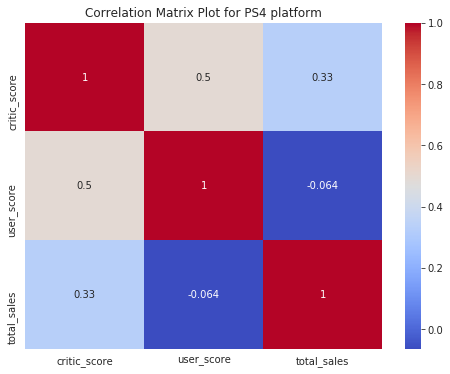

,critic_score,user_score,total_sales
critic_score,1.000000,0.496274,0.333615
user_score,0.496274,1.000000,-0.064075
total_sales,0.333615,-0.064075,1.000000


In [57]:
# plot the correlation matrix
corrMatrix(new_data, 'PS4')
plt.show();

# corr between PS4 platform w/critic score,user score and total sales
display(platform_corr(new_data, 'PS4'))

In [58]:
# determine the Pearson corr between `user review` & `total sales` in `PS4`
pearson_coeff(new_data, 'user_score', 'total_sales', 'PS4')

The Pearson Correlation Coefficient is -0.064, with a p-value of 0.215

Intermediate conclusion:
Since p-value is > 0.1, a no evidence that the correlation between User score and Total sales is statistically significant


In [59]:
# determine the pearson correlation between `professional review` and `total sales` for `PS4`
pearson_coeff(new_data, 'critic_score', 'total_sales', 'PS4')

The Pearson Correlation Coefficient is 0.334, with a p-value of 0.000

Intermediate conclusion:
Since p-value is < 0.001, a strong evidence for correlation betweenCritic score and Total sales is statistically significant, although the linear relationship isn't extremely strong (≈0.334)


We can see from the pearson coefficient that the correlation between `Critic score` and `Total sales` is statistically significant for the `PS4` platform.

What if we sum the two review and recheck our analysis? Will we arrive at the same conclusion?

In [60]:
# sum of reviews
new_data['review_score'] = \
new_data[['critic_score','user_score']].apply(lambda x: (x[0] + x[1]*10)/2, axis=1)
new_data.head()

,title,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,review_score
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,71,7.5,M,14.63,73.0
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62,90.0
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,71,7.5,E,11.68,73.0
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58,62.5
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,71,7.5,M,7.98,73.0


In [61]:
# calculating the pearson correlation among variables
pearson_review_coeff(new_data, 'review_score', 'total_sales', 'PS4')

The Pearson Correlation Coefficient is 0.135, with a p-value of 0.009

Intermediate conclusion:
Since the p-value is < 0.05, there is moderate evidence that the correlation between Review score and Total sales is statistically significant, although the linear relationship isn't extremely strong (≈0.135)


Clearly the correlation between reviews and sales is statistically significant. We can plot scatter plot for reviews vs. sales for `PS4`.

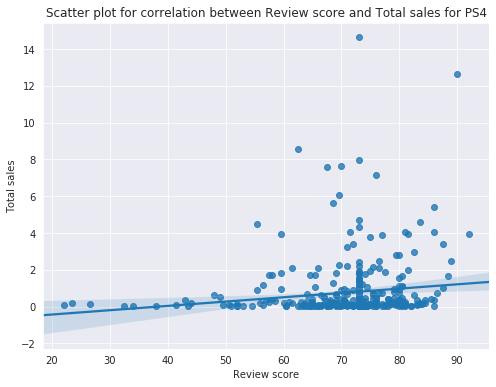

In [62]:
# scatter between `professional review` and `total sales` for `PS4`
plot_sns_scatter(new_data, 'review_score', 'total_sales', 'PS4')

In [63]:
# correlation of review score and total sales
new_data[new_data.platform == 'PS4'][['review_score', 'total_sales']].corr()

,review_score,total_sales
review_score,1.000000,0.134513
total_sales,0.134513,1.000000


<br><b style="font-size: 17px;">Intermediate conclusion:</b>

The scatter plot show, that professional review has some significance with total sales. We can compare the sales of other top platform to make a comparative analysis.

<br><b style="font-size: 17px;">Sony PS3 platform</b><br>

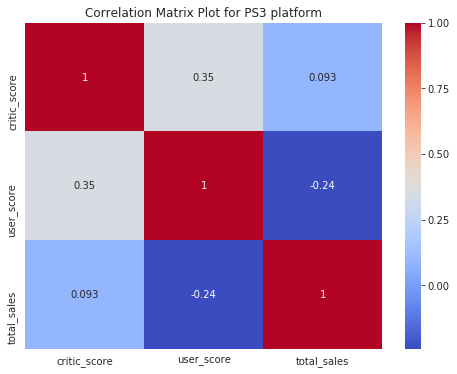

,critic_score,user_score,total_sales
critic_score,1.000000,0.352523,0.092787
user_score,0.352523,1.000000,-0.243065
total_sales,0.092787,-0.243065,1.000000


The Pearson Correlation Coefficient is -0.173, with a p-value of 0.011

Intermediate conclusion:
Since the p-value is < 0.05, there is moderate evidence that the correlation between Review score and Total sales is statistically significant, although the linear relationship isn't extremely strong (≈0.173)


In [64]:
# plot the correlation matrix
corrMatrix(new_data, 'PS3')
plt.show();

# corr between PS3 platform w/critic score,user score and total sales
display(platform_corr(new_data, 'PS3'))

# calculating the pearson correlation among variables
pearson_review_coeff(new_data, 'review_score', 'total_sales', 'PS3')

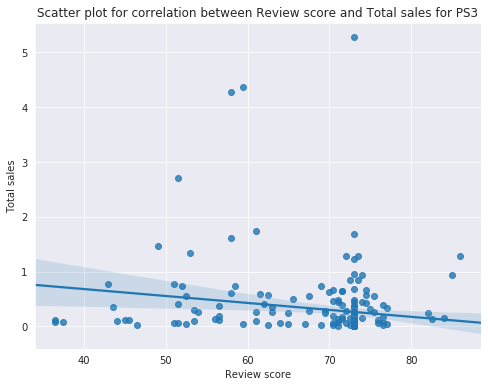

In [65]:
# scatter between `professional review` and `total sales` for `PS3`
plot_sns_scatter(new_data, 'review_score', 'total_sales', 'PS3')

In [66]:
# correlation of review score and total sales
new_data[new_data.platform == 'PS3'][['review_score', 'total_sales']].corr()

,review_score,total_sales
review_score,1.000000,-0.172507
total_sales,-0.172507,1.000000


<br><b style="font-size: 17px;">Intermediate conclusion:</b>

The `PS3` platform correlation between Review score and `Total sales` is statistically significant. This means that there is moderate evidence to conclude there is a significant linear relationship between professional review and `Total sales` because the correlation coefficient is significantly different from zero. What this means is that there is a significant linear relationship between Review score and `Total sales`.

<br><b style="font-size: 17px;">Nintendo 3DS platform</b><br>

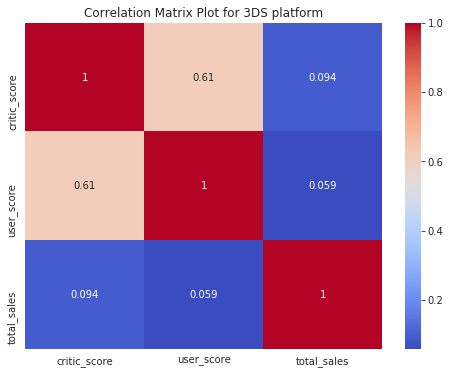

,critic_score,user_score,total_sales
critic_score,1.000000,0.614492,0.094281
user_score,0.614492,1.000000,0.058640
total_sales,0.094281,0.058640,1.000000


The Pearson Correlation Coefficient is 0.083, with a p-value of 0.229

Intermediate conclusion:
Since the p-value is > 0.1, there is no evidence that the correlation between Review score and Total sales is statistically significant


In [67]:
# plot the correlation matrix
corrMatrix(new_data, '3DS')
plt.show();

# corr between 3DS platform w/critic score,user score and total sales
display(platform_corr(new_data, '3DS'))

# calculating the pearson correlation among variables
pearson_review_coeff(new_data, 'review_score', 'total_sales', '3DS')

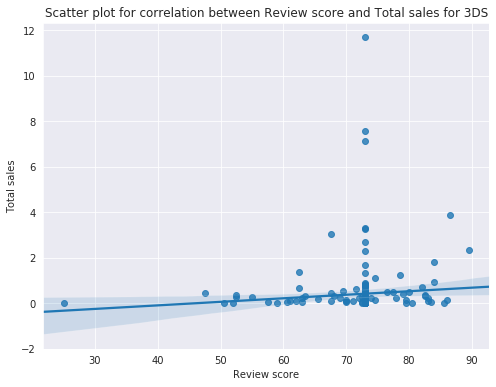

In [68]:
# scatter between `professional review` and `total sales` for `3DS`
plot_sns_scatter(new_data, 'review_score', 'total_sales', '3DS')

In [69]:
# correlation of review score and total sales
new_data[new_data.platform == '3DS'][['review_score', 'total_sales']].corr()

,review_score,total_sales
review_score,1.000000,0.082953
total_sales,0.082953,1.000000


Since the test concludes that there is no evidence that the correlation between Review score and `Total sales` is statistically significant, it means that there is no significant linear relationship between Review score and `Total sales`.

<br><b style="font-size: 17px;">Microsoft XONE (Aka: Microsoft Xbox one) platform</b><br>

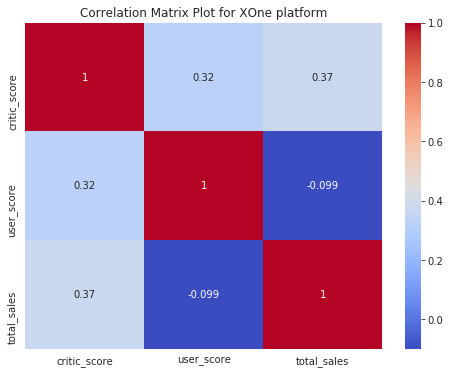

,critic_score,user_score,total_sales
critic_score,1.000000,0.324563,0.373566
user_score,0.324563,1.000000,-0.099217
total_sales,0.373566,-0.099217,1.000000


The Pearson Correlation Coefficient is 0.140, with a p-value of 0.035

Intermediate conclusion:
Since the p-value is < 0.05, there is moderate evidence that the correlation between Review score and Total sales is statistically significant, although the linear relationship isn't extremely strong (≈0.140)


In [70]:
# plot the correlation matrix
corrMatrix(new_data, 'XOne')
plt.show();

# corr between XOne platform w/critic score,user score and total sales
display(platform_corr(new_data, 'XOne'))

# calculating the pearson correlation among variables
pearson_review_coeff(new_data, 'review_score', 'total_sales', 'XOne')

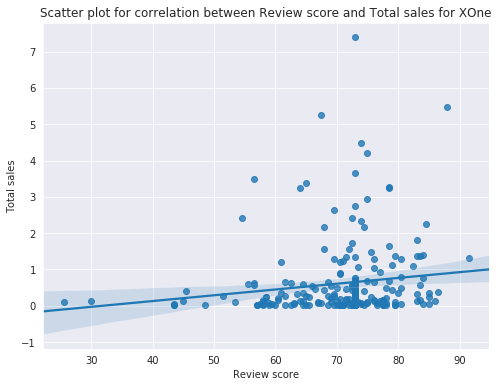

In [71]:
# scatter between `professional review` and `total sales` for `XOne`
plot_sns_scatter(new_data, 'review_score', 'total_sales', 'XOne')

In [72]:
# correlation of review score and total sales
new_data[new_data.platform == 'XOne'][['review_score', 'total_sales']].corr()

,review_score,total_sales
review_score,1.000000,0.139924
total_sales,0.139924,1.000000


Since the test concludes that the correlation between the two variables is significant, then there is sufficient evidence to conclude that there is a significant linear relationship between Review score and Total sales. This means that there is a significant linear relationship between Review score and `Total sales`.

<br><b style="font-size: 17px;">Microsoft X360 (Aka: Microsoft Xbox 360) platform</b><br>

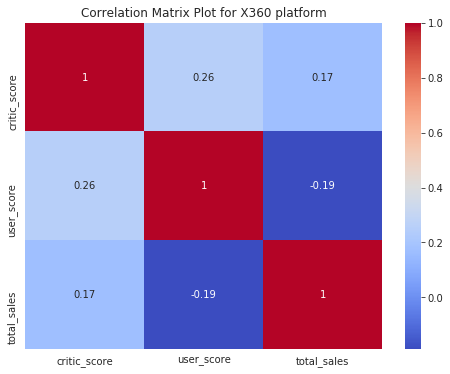

,critic_score,user_score,total_sales
critic_score,1.000000,0.257391,0.173672
user_score,0.257391,1.000000,-0.187351
total_sales,0.173672,-0.187351,1.000000


The Pearson Correlation Coefficient is -0.087, with a p-value of 0.363

Intermediate conclusion:
Since the p-value is > 0.1, there is no evidence that the correlation between Review score and Total sales is statistically significant


In [73]:
# plot the correlation matrix
corrMatrix(new_data, 'X360')
plt.show();

# corr between X360 platform w/critic score,user score and total sales
display(platform_corr(new_data, 'X360'))


# calculating the pearson correlation among variables
pearson_review_coeff(new_data, 'review_score', 'total_sales', 'X360')

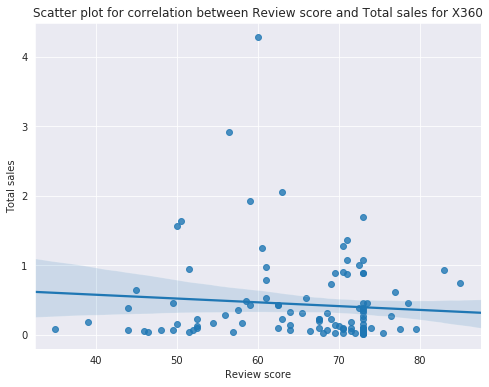

In [74]:
# scatter between `professional review` and `total sales` for `X360`
plot_sns_scatter(new_data, 'review_score', 'total_sales', 'X360')

In [75]:
# correlation of review score and total sales
new_data[new_data.platform == 'X360'][['review_score', 'total_sales']].corr()

,review_score,total_sales
review_score,1.000000,-0.087122
total_sales,-0.087122,1.000000


For the X360 platform, since the test concludes that there is no evidence that the correlation between Review score and `Total sales` is statistically significant, it means that there is no significant linear relationship between Review score and `Total sales`.

<br><b style="font-size: 17px;">Intermediate conclusion:</b><br>

We computed p-value and determined that in the `X360` and `3DS` platform, there is no evidence to show that a significant linear relationship exists between Review score and `Total sales`. For the other top products (`PS4`, `XOne` and `PS3`), there is evidence to show that linear relationship exists between Review score and `Total sales`. Hence we can say that user and professional reviews affects the `Total sales` in `PS4`, `XOne` and `PS3`.

<br><b style="font-size: 20px;">Take a look at the general distribution of games by genre</b><br>

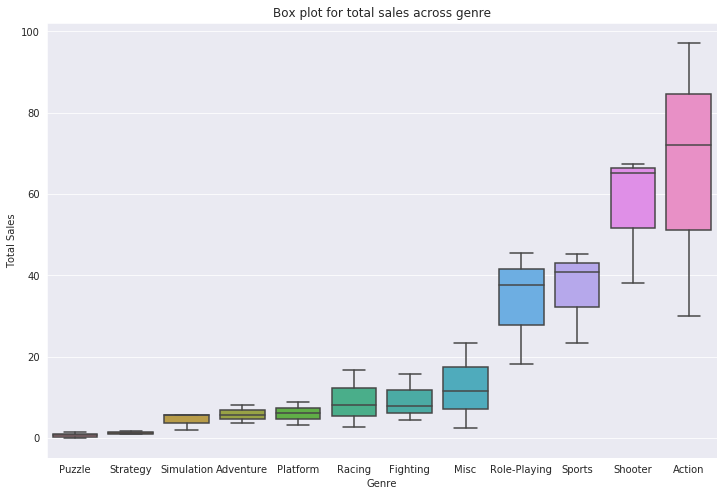

In [76]:
# box plot for total sales across genres
plot_box(new_data, 'genre', 'total_sales', 'Total Sales', 'Box plot for total sales across genre', np.sum)

Our boxplot show that the most profitable genres is the *Action*, *Sports* and *Shooter* ones. The least profitable `genre` is the *Strategy*.

Also, from the plot, the *Misc* bring more money even though it has a lower mean.

To generalize about `genre`, we have to take the average `total sales` across genres.

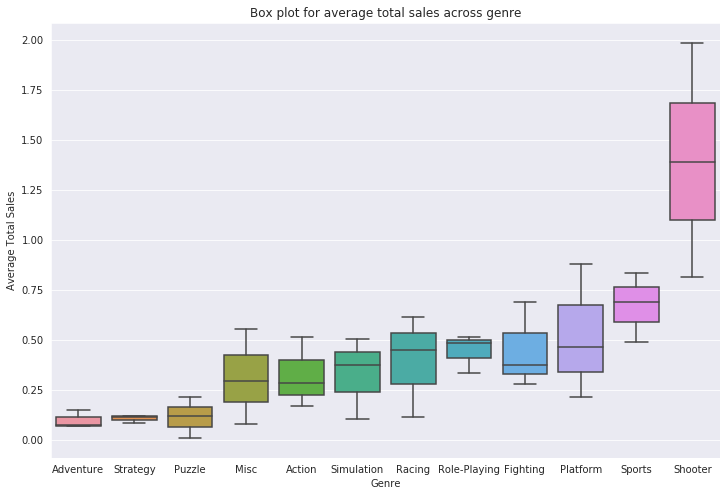

In [77]:
# box plot for average total sales across genres
plot_box(new_data, 'genre', 'total_sales', 'Average Total Sales','Box plot for average total sales across genre', np.mean)

Looking at the box plot for the average `total sales` a cross genre, we can conclude that the *Adventure* and *Strategy* genres are still the least profitable genres.

Also, the *Shooter* and *Sports* genres are the most profitable genres a cross the platforms.

<br><b style="font-size: 20px;">Top 5 `titles` by `total sales`:</b><br>

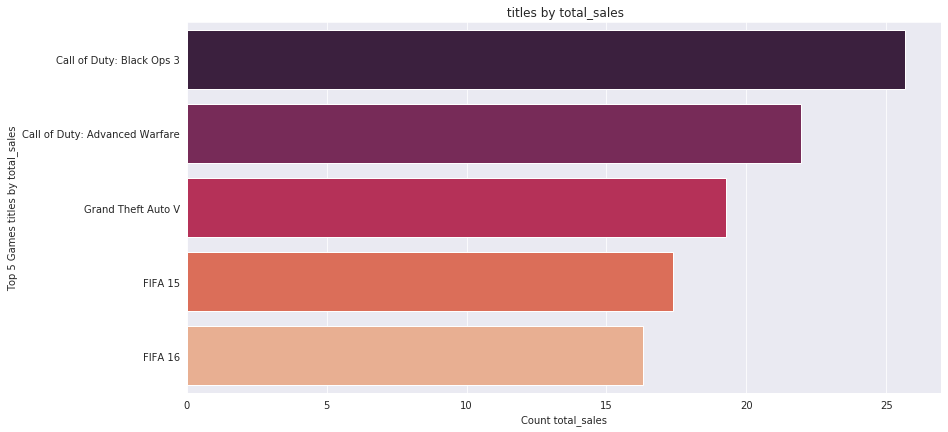

,title,total_sales,total_sales_%
109,Call of Duty: Black Ops 3,25.67,3.519090
108,Call of Duty: Advanced Warfare,21.97,3.011858
328,Grand Theft Auto V,19.26,2.640345
255,FIFA 15,17.37,2.381246
256,FIFA 16,16.30,2.234560


In [78]:
# get title vs total sales data
top_5_titles=new_data.groupby(['title'])['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending = False)
top_5_titles['total_sales_%'] = (top_5_titles['total_sales'] / top_5_titles['total_sales'].sum()) * 100
top_5_titles.reset_index(drop=True)

plt.figure(figsize=(40,15))
plt.subplots_adjust(wspace=0.96)
ax1 = plt.subplot(2,2,1)
sns.barplot(y="title", x="total_sales", data=top_5_titles.head(),palette=("rocket"))
plt.xlabel('Count total_sales')
plt.ylabel('Top 5 Games titles by total_sales')
plt.title(' titles by total_sales')
plt.show();

display(top_5_titles.head());

As we see at the boxplot , also the most profitable three titles is "Call of Duty: Black Ops 3" and "Call of Duty: Advanced Warfare" belong to the *Shooter* genre and "Grand Theft Auto V" all belong to the *Action* genre, close the list is the best seller *sports** game fifa in version 15 and 16.

<br><b style="font-size: 17px;">Intermediate conclusion:</b><br>

After investigated how many games were released in different years and observed that more games were released in the years 2001 to 2016.

And found that most of the games were released between years 2005 and 2011. The year with the highest number of games released was 2008.

We determined from analysis that the period 2000 to 2016 was significant with year between 2007 and 2010 having the most significance in the data.

The analysis of sales variation across platforms shows that the top five platforms in terms of total sales were the PS2 and PS3, DS and Wii and X360 respectively.

The platform with the least sales were SCD, WS, 3DO, TG16, PCFX, and GG. We also determined that the PC had the highest sale in 2011.

The PC is the platform with the longest lifespan among the other platform selling for about 30 years. It generally takes about 6 years for new platforms to appear and old ones to fade.

We determined that PS4, PS3, XOne, 3DS and X360 are the platform that is leading in sales.

This makes them the most profitable platforms. The TG16, 3DO, GG, and PCFX are the worst platform in terms of total sales with values well below the mean of the data. We looked at how user and professional reviews affect sales for one popular platform from year 2014.

We concluded after computing the p-value and analyzing the statistics that there is a significant linear relationship between user and professional reviews and Total sales for the top products. Hence, user review affects the total sales.

Also that *Shooter*, *Action* and *sports* are the most profitable genres a cross the platforms with games like "Call of Duty: Black Ops 3" and "Call of Duty: Advanced Warfare" , "Grand Theft Auto V" and "Fifa" 15 and 16.

<br>

<b id="open_the_data" style="font-size: 25px;">VI - Create a user profile for each region:</b><br>

<br><b style="font-size: 17px;">Top 5 platforms</b><br>

Let's determine the top 5 sales by platform in each region

<b style="font-size: 20px;">Region NA (North America):</b><br>

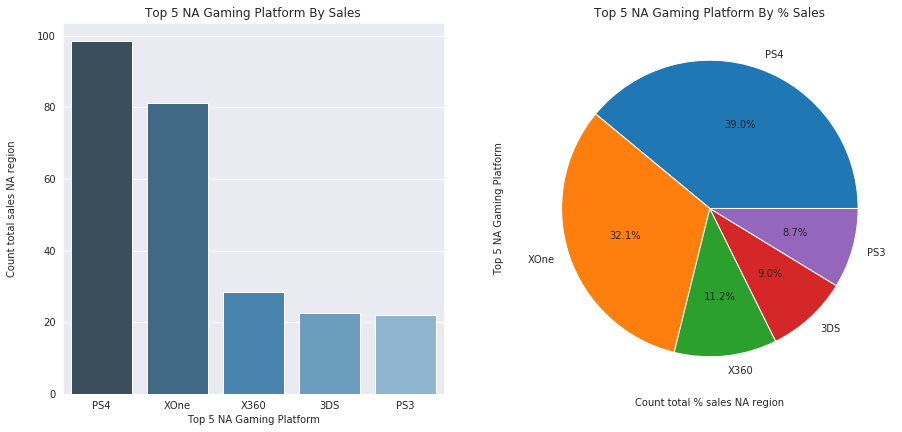

In [79]:
# get region NA data
top_5_platform_na=new_data.groupby(['platform'])['na_sales'].sum().reset_index().sort_values(by='na_sales',ascending = False)
top_5_platform_na['na_platform_%'] = (top_5_platform_na['na_sales'] / top_5_platform_na['na_sales'].sum()) * 100

plt.figure(figsize=(15,15))
ax1 = plt.subplot(2,2,1)
sns.barplot(x="platform", y="na_sales", data=top_5_platform_na.head(),palette=("Blues_d"))
plt.ylabel('Count total sales NA region')
plt.xlabel('Top 5 NA Gaming Platform')
plt.title('Top 5 NA Gaming Platform By Sales')
ax1.yaxis.labelpad = 20

ax2 = plt.subplot(2,2,2)
labels = ['PS4', 'XOne', 'X360', '3DS', 'PS3']
plt.pie(data=top_5_platform_na.head(), autopct='%1.1f%%',x="na_platform_%", labels=labels)
plt.xlabel('Count total % sales NA region')
plt.ylabel('Top 5 NA Gaming Platform')
plt.title('Top 5 NA Gaming Platform By % Sales')
ax2.yaxis.labelpad = 20
plt.show();

Here we see that in both ends we have Sony consoles on top the PS4 39% and in the bottom PS3 ~8.7%

<b style="font-size: 20px;">Region EU (Europe):</b><br>

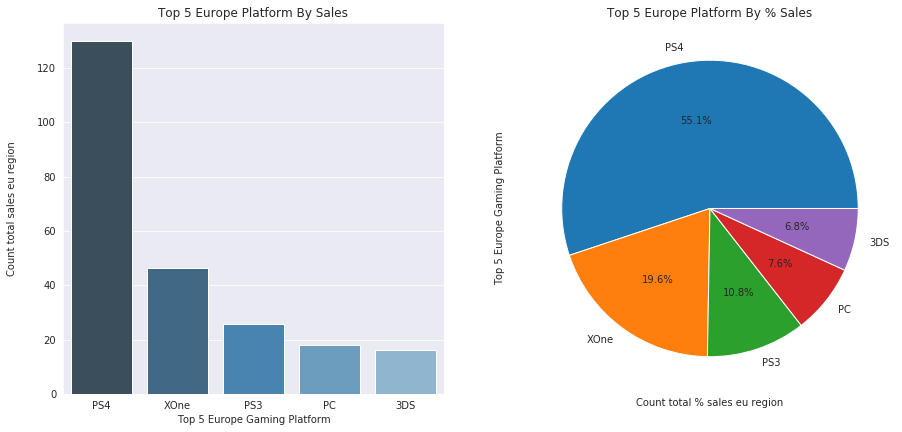

In [80]:
# get region EU data
top_5_platform_eu=new_data.groupby(['platform'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales',ascending = False)
top_5_platform_eu['eu_platform_%'] = (top_5_platform_eu['eu_sales'] / top_5_platform_eu['eu_sales'].sum()) * 100

plt.figure(figsize=(15,15))
ax1 = plt.subplot(2,2,1)
sns.barplot(x="platform", y="eu_sales", data=top_5_platform_eu.head(),palette=("Blues_d"))
plt.ylabel('Count total sales eu region')
plt.xlabel('Top 5 Europe Gaming Platform')
plt.title('Top 5 Europe Platform By Sales')
ax1.yaxis.labelpad = 20

ax2 = plt.subplot(2,2,2)
labels = ['PS4', 'XOne', 'PS3', 'PC', '3DS']
plt.pie(data=top_5_platform_eu.head(), autopct='%1.1f%%',x="eu_platform_%", labels=labels)
plt.xlabel('Count total % sales eu region')
plt.ylabel('Top 5 Europe Gaming Platform')
plt.title('Top 5 Europe Platform By % Sales')
ax2.yaxis.labelpad = 20
plt.show();

The platform with the most market share in the `EU` region is PS4 with 55.1% while Nintendo 3DS has the least market share of 6.8%

<b style="font-size: 20px;">Region JP (Japan):</b><br>

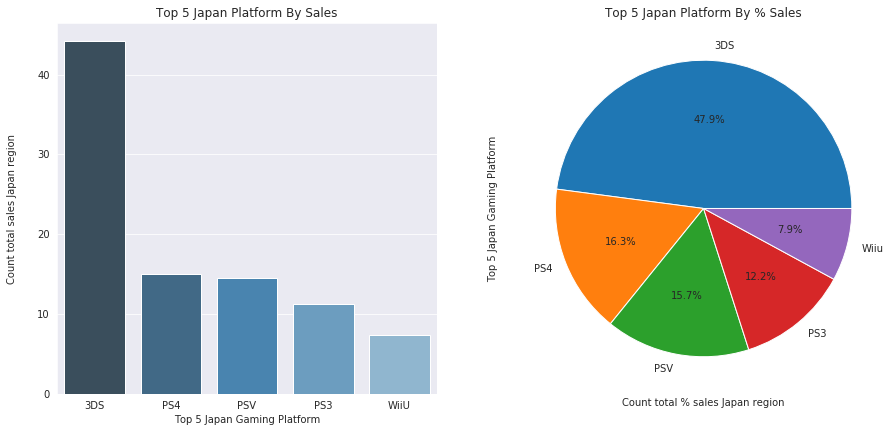

In [81]:
# get region JP data
top_5_platform_jp=new_data.groupby(['platform'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales',ascending = False)
top_5_platform_jp['jp_platform_%'] = (top_5_platform_jp['jp_sales'] / top_5_platform_jp['jp_sales'].sum()) * 100

plt.figure(figsize=(15,15))
ax1 = plt.subplot(2,2,1)
sns.barplot(x="platform", y="jp_sales", data=top_5_platform_jp.head(),palette=("Blues_d"))
plt.ylabel('Count total sales Japan region')
plt.xlabel('Top 5 Japan Gaming Platform')
plt.title('Top 5 Japan Platform By Sales')
ax1.yaxis.labelpad = 20

ax2 = plt.subplot(2,2,2)
labels = ['3DS', 'PS4', 'PSV', 'PS3', 'Wiiu']
plt.pie(data=top_5_platform_jp.head(), autopct='%1.1f%%',x="jp_platform_%", labels=labels)
plt.xlabel('Count total % sales Japan region')
plt.ylabel('Top 5 Japan Gaming Platform')
plt.title('Top 5 Japan Platform By % Sales')
ax2.yaxis.labelpad = 20
plt.show();


The platform with the most market share in the `JP` region is Nintendo 3DS with 47.9% while Nintendo WiiU has the least market share of 7.9%

<b style="font-size: 17px;">Intermediate conclusion:</b><br>

We observe several variations in the market shares across the top 5 platforms from region to region. The North America (`NA` region) gamers, puts the Sony PS4 has the most market share. In Europe (`EU` region), also the leader is the Sony PS4 has the most market share. this could be since Sony push there platform outside japan very strong with outstanding games. In the other hand in the home land Japan (`JP` region), Nintendo `3DS` is the leader the could be since japanese people love *Anime* more than anything else.

<b style="font-size: 20px;">Top 5 genres:</b><br>

<b style="font-size: 20px;">Region NA (North America):</b><br>

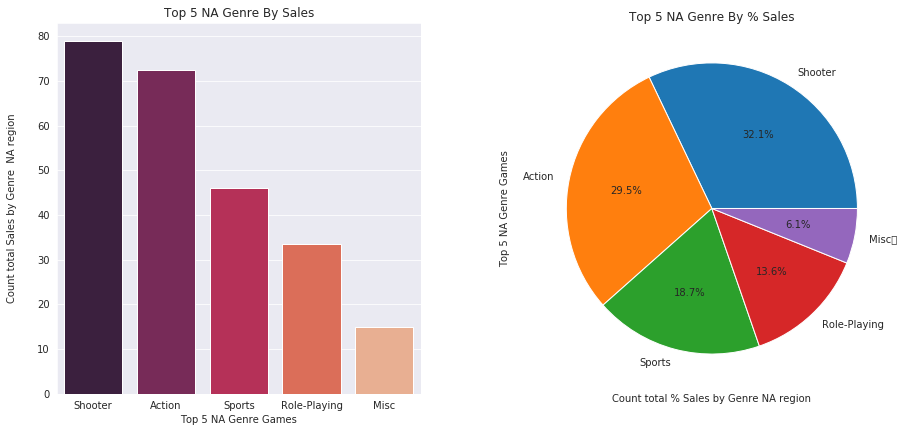

In [82]:
# get genre NA data
top_5_genre_na=new_data.groupby(['genre'])['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending = False)
top_5_genre_na['na_genre_%'] = (top_5_genre_na['na_sales'] / top_5_genre_na['na_sales'].sum()) * 100
top_5_genre_na.reset_index(drop=True)

plt.figure(figsize=(15,15))
#fig.tight_layout() # Or equivalently,"plt.tight_layout()"

plt.subplots_adjust(wspace=0.3)
ax1 = plt.subplot(2,2,1)
sns.barplot(x="genre", y="na_sales", data=top_5_genre_na.head(),palette=("rocket"))
plt.ylabel('Count total Sales by Genre  NA region')
plt.xlabel('Top 5 NA Genre Games')
plt.title('Top 5 NA Genre By Sales')
ax1.yaxis.labelpad = 20

ax2 = plt.subplot(2,2,2)
labels = ['Shooter', 'Action', 'Sports', 'Role-Playing', 'Misc	']
plt.pie(data=top_5_genre_na.head(), autopct='%1.1f%%',x="na_genre_%", labels=labels)
plt.xlabel('Count total % Sales by Genre NA region')
plt.ylabel('Top 5 NA Genre Games')
plt.title('Top 5 NA Genre By % Sales')
ax2.yaxis.labelpad = 20
plt.show();

The Genre leader for the NA region market is *shooter* with 32.1% and Misc in last place and since this mix of games and maybe genres the close to last place is *Role-playing with 13.6%. 

<b style="font-size: 20px;">Region EU (Europe):</b><br>

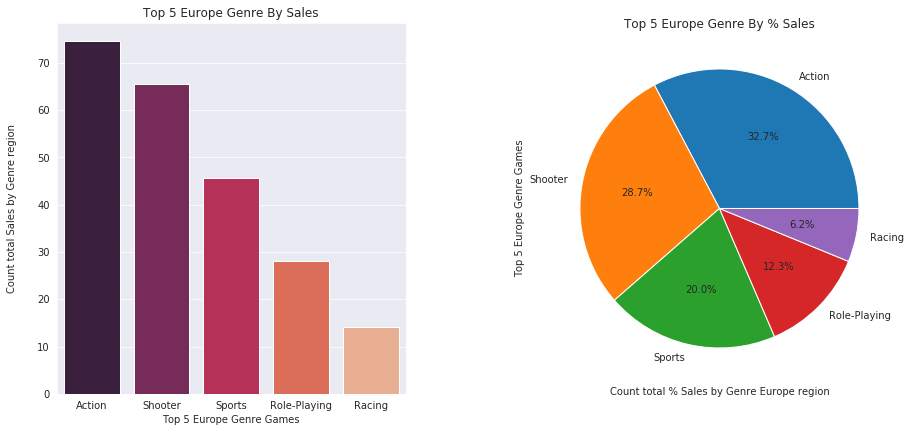

In [83]:
# get genre EU data
top_5_genre_eu=new_data.groupby(['genre'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales',ascending = False)
top_5_genre_eu['eu_genre_%']=(top_5_genre_eu['eu_sales'] / top_5_genre_eu['eu_sales'].sum()) * 100
top_5_genre_eu.reset_index(drop=True)

plt.figure(figsize=(15,15))
#fig.tight_layout() # Or equivalently, "plt.tight_layout()"

plt.subplots_adjust(wspace=0.4)
ax1 = plt.subplot(2,2,1)
sns.barplot(x="genre", y="eu_sales", data=top_5_genre_eu.head(),palette=("rocket"))
plt.ylabel('Count total Sales by Genre region')
plt.xlabel('Top 5 Europe Genre Games')
plt.title('Top 5 Europe Genre By Sales')
ax1.yaxis.labelpad = 20

ax2 = plt.subplot(2,2,2)
labels = ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Racing']
plt.pie(data=top_5_genre_eu.head(), autopct='%1.1f%%',x="eu_genre_%", labels=labels)
plt.xlabel('Count total % Sales by Genre Europe region')
plt.ylabel('Top 5 Europe Genre Games')
plt.title('Top 5 Europe Genre By % Sales')
ax2.yaxis.labelpad = 20
plt.show();

The Genre leader for the EU region market is *Action* with 32.7 and *Racing* in last place with 6.2%. 

<b style="font-size: 20px;">Region JP (Japan):</b><br>

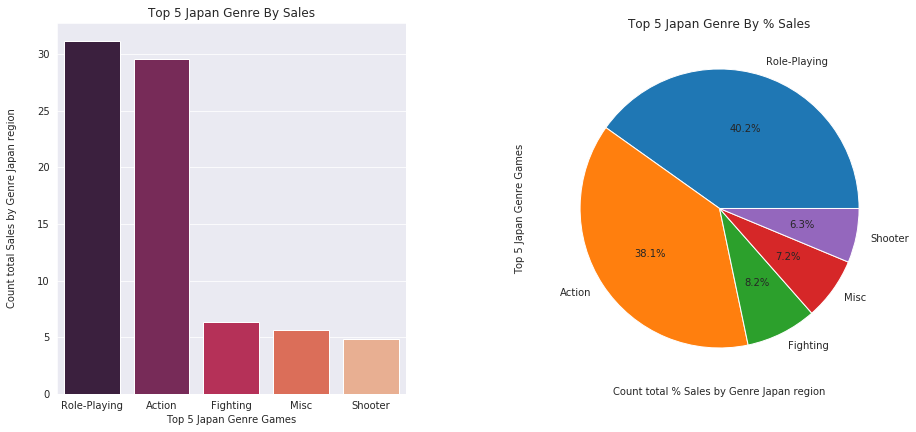

In [84]:
# get genre JP data
top_5_genre_jp=new_data.groupby(['genre'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending = False)
top_5_genre_jp['jp_genre_%'] = (top_5_genre_jp['jp_sales'] / top_5_genre_jp['jp_sales'].sum()) * 100
top_5_genre_jp.reset_index(drop=True)

plt.figure(figsize=(15,15))
#fig.tight_layout() # Or equivalently, "plt.tight_layout()"

plt.subplots_adjust(wspace=0.4)
ax1 = plt.subplot(2,2,1)
sns.barplot(x="genre", y="jp_sales", data=top_5_genre_jp.head(),palette=("rocket"))
plt.ylabel('Count total Sales by Genre Japan region')
plt.xlabel('Top 5 Japan Genre Games')
plt.title('Top 5 Japan Genre By Sales')
ax1.yaxis.labelpad = 20

ax2 = plt.subplot(2,2,2)
labels = ['Role-Playing', 'Action', 'Fighting', 'Misc', 'Shooter']
plt.pie(data=top_5_genre_jp.head(), autopct='%1.1f%%',x="jp_genre_%", labels=labels)
plt.xlabel('Count total % Sales by Genre Japan region')
plt.ylabel('Top 5 Japan Genre Games')
plt.title('Top 5 Japan Genre By % Sales')
ax2.yaxis.labelpad = 20
plt.show();

The Genre leader for the JP region market is *Role-Playing* (remember we told abut *Anime* - this is the game genre for it) with 40.2% and *Shooter* in last place with 6.3%. 

<b style="font-size: 17px;">Intermediate conclusion:</b><br>

The `NA` region and `EU` region are pretty similar, The major difference between those two region is the presence of *Misc* genre in the `NA` market against *Racing* in the `EU` market. 

Intersting to see that `JP` in one side love *Anime* games that part of the *Role-Playing* that is some how to more nice games genre in the other hand close it it we have *Action* and in third place *Fighting*.

<br><b style="font-size: 20px;">Do ESRB ratings affect sales in individual regions?</b><br>

<b style="font-size: 20px;">Region NA (North America):</b><br>

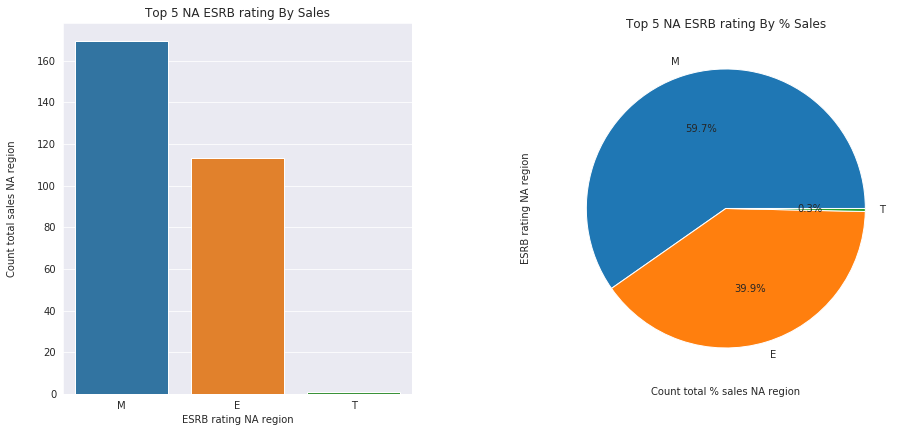

In [85]:
# get NA's ESRB ratings
new_data_ratings_na = new_data.groupby(['rating'])['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending = False)
new_data_ratings_na['na_esrb_%'] = (new_data_ratings_na['na_sales'] / new_data_ratings_na['na_sales'].sum()) * 100
new_data_ratings_na = new_data_ratings_na.reset_index(drop=True)
new_data_ratings_na

plt.figure(figsize=(15,15))
#fig.tight_layout() # Or equivalently, "plt.tight_layout()"

plt.subplots_adjust(wspace=0.4)
ax1 = plt.subplot(2,2,1)
sns.barplot(x="rating", y="na_sales", data=new_data_ratings_na)
plt.ylabel('Count total sales NA region')
plt.xlabel('ESRB rating NA region')
plt.title('Top 5 NA ESRB rating By Sales')
ax1.yaxis.labelpad = 20

ax2 = plt.subplot(2,2,2)
labels = ['M', 'E', 'T']
plt.pie(data=new_data_ratings_na.head(), autopct='%1.1f%%',x="na_esrb_%", labels=labels)
plt.xlabel('Count total % sales NA region')
plt.ylabel('ESRB rating NA region')
plt.title('Top 5 NA ESRB rating By % Sales')
ax2.yaxis.labelpad = 20
plt.show();

The ESRB leader for the NA region market is *M* the older teenagers with almost 60% This is the age which most of the heavy gamers from the industry are. in the bottom we have the *T* which is the younger teenagers with less than 1%

<b style="font-size: 20px;">Region EU (Europe):</b><br>

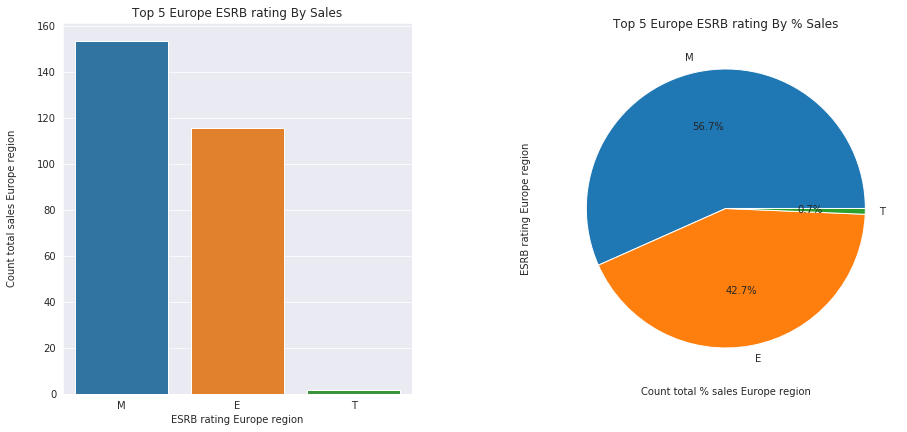

In [86]:
# get EU's ESRB ratings
new_data_ratings_eu = new_data.groupby(['rating'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending = False)
new_data_ratings_eu['eu_esrb_%'] = (new_data_ratings_eu['eu_sales'] / new_data_ratings_eu['eu_sales'].sum()) * 100
new_data_ratings_eu = new_data_ratings_eu.reset_index(drop=True)
new_data_ratings_eu

plt.figure(figsize=(15,15))
#fig.tight_layout() # Or equivalently, "plt.tight_layout()"

plt.subplots_adjust(wspace=0.4)
ax1 = plt.subplot(2,2,1)
sns.barplot(x="rating", y="eu_sales", data=new_data_ratings_eu)
plt.ylabel('Count total sales Europe region')
plt.xlabel('ESRB rating Europe region')
plt.title('Top 5 Europe ESRB rating By Sales')
ax1.yaxis.labelpad = 20

ax2 = plt.subplot(2,2,2)
labels = ['M', 'E', 'T']
plt.pie(data=new_data_ratings_eu.head(), autopct='%1.1f%%',x="eu_esrb_%", labels=labels)
plt.xlabel('Count total % sales Europe region')
plt.ylabel('ESRB rating Europe region')
plt.title('Top 5 Europe ESRB rating By % Sales')
ax2.yaxis.labelpad = 20
plt.show();

The ESRB leader for the EU region market is *M* same as in NA also here almost ~60% This is the age which most of the heavy gamers from the industry are. in the bottom again we have the *T* which is the younger teenagers with less than 1%

<b style="font-size: 20px;">Region JP (Japan):</b><br>

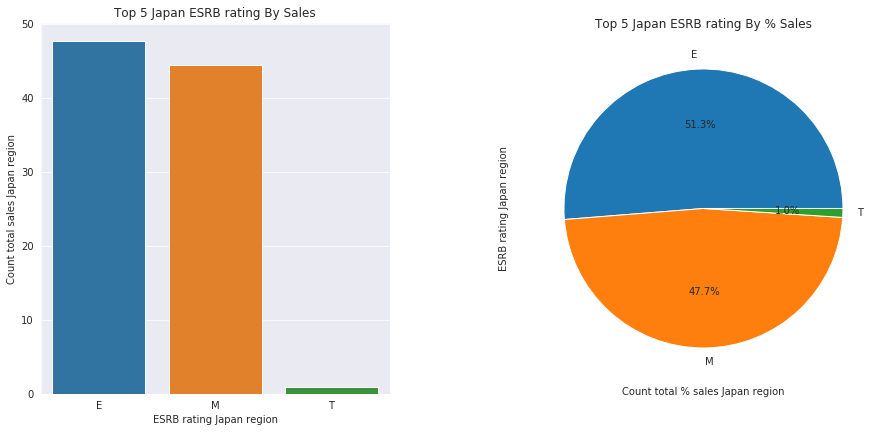

In [87]:
# get JP's ESRB ratings
new_data_ratings_jp = new_data.groupby(['rating'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending = False)
new_data_ratings_jp['jp_esrb_%'] = (new_data_ratings_jp['jp_sales'] / new_data_ratings_jp['jp_sales'].sum()) * 100
new_data_ratings_jp = new_data_ratings_jp.reset_index(drop=True)
new_data_ratings_jp

plt.figure(figsize=(15,15))
#fig.tight_layout() # Or equivalently, "plt.tight_layout()"

plt.subplots_adjust(wspace=0.4)
ax1 = plt.subplot(2,2,1)
sns.barplot(x="rating", y="jp_sales", data=new_data_ratings_jp)
plt.ylabel('Count total sales Japan region')
plt.xlabel('ESRB rating Japan region')
plt.title('Top 5 Japan ESRB rating By Sales')


ax2 = plt.subplot(2,2,2)
labels = ['E', 'M', 'T']
plt.pie(data=new_data_ratings_jp.head(), autopct='%1.1f%%',x="jp_esrb_%", labels=labels)
plt.xlabel('Count total % sales Japan region')
plt.ylabel('ESRB rating Japan region')
plt.title('Top 5 Japan ESRB rating By % Sales')
ax2.yaxis.labelpad = 20
plt.show();

The ESRB leader for the JP region market is *E* which mean everone non-violent games that are suitable for all ages is definitely a more positive and optimistic way of thinking to the world around us. in the bottom also here the *T* which is the younger teenagers with 1%

<b style="font-size: 17px;">Intermediate conclusion:</b><br>

Looking at the overall result we can see that all the regions share the same ESRB rating E,T,M when NA and EU prefer the more violent games, JP prefer the non-violent games for everone , very intersting.

<br><b style="font-size: 20px;">Extra, Top 5 titles by Region:</b><br>

<b style="font-size: 20px;">Region NA (North America):</b><br>

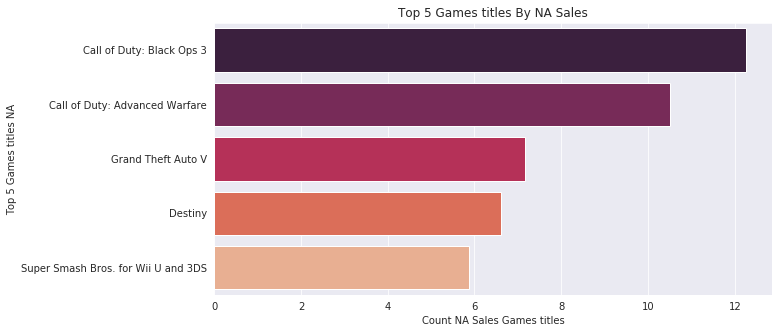

,title,na_sales,na_sales_%
109,Call of Duty: Black Ops 3,12.25,4.312469
108,Call of Duty: Advanced Warfare,10.51,3.699923
328,Grand Theft Auto V,7.16,2.520594
165,Destiny,6.62,2.330494
768,Super Smash Bros. for Wii U and 3DS,5.87,2.066465


In [88]:
# get genre NA data
top_5_titles_na=new_data.groupby(['title'])['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending = False)
top_5_titles_na['na_sales_%'] = (top_5_titles_na['na_sales'] / top_5_titles_na['na_sales'].sum()) * 100
top_5_titles_na.reset_index(drop=True)

plt.figure(figsize=(10,5))
#fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
sns.barplot(y="title", x="na_sales", data=top_5_titles_na.head(),palette=("rocket"))
plt.xlabel('Count NA Sales Games titles')
plt.ylabel('Top 5 Games titles NA')
plt.title('Top 5 Games titles By NA Sales')
plt.show();

display(top_5_titles_na.head());

As we can see the leader title in NA is "Call of Duty: Black Ops 3" with 4.3% when in the last place "Super Smash Bros. for Wii U and 3DS" with 2% 

<b style="font-size: 20px;">Region EU (Europe):</b><br>

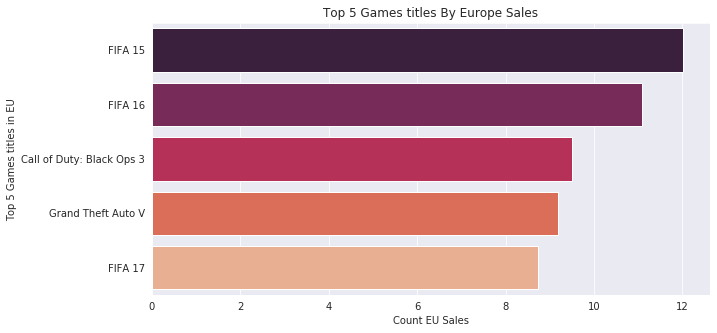

,title,eu_sales,eu_sales_%
255,FIFA 15,12.02,4.440668
256,FIFA 16,11.09,4.097089
109,Call of Duty: Black Ops 3,9.49,3.505985
328,Grand Theft Auto V,9.19,3.395153
257,FIFA 17,8.74,3.228905


In [89]:
# get genre EU data
top_5_titles_eu=new_data.groupby(['title'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending = False)
top_5_titles_eu['eu_sales_%'] = (top_5_titles_eu['eu_sales'] / top_5_titles_eu['eu_sales'].sum()) * 100
top_5_titles_eu.reset_index(drop=True)

plt.figure(figsize=(10,5))
#fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
sns.barplot(y="title", x="eu_sales", data=top_5_titles_eu.head(),palette=("rocket"))
plt.xlabel('Count EU Sales')
plt.ylabel('Top 5 Games titles in EU')
plt.title('Top 5 Games titles By Europe Sales')
plt.show();

display(top_5_titles_eu.head());

As we can see the leader title in EU is "Fifa 15" with 4.4% when in the last place one of the newest games in the 2016 market and in our dataset "Fifa 17" that come out in sep' 16 with 3.2%

<b style="font-size: 20px;">Region JP (Japan):</b><br>

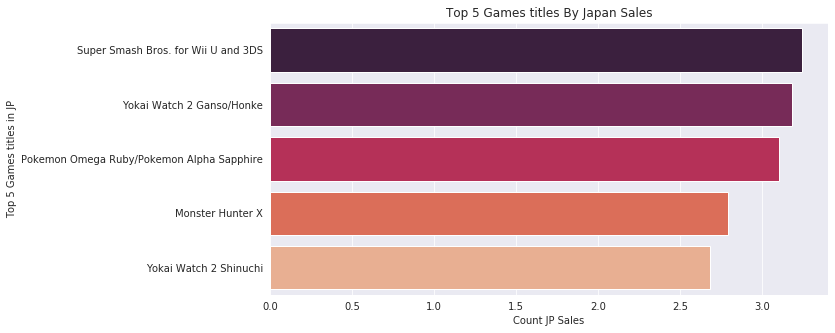

,title,jp_sales,jp_sales_%
768,Super Smash Bros. for Wii U and 3DS,3.24,3.480503
938,Yokai Watch 2 Ganso/Honke,3.18,3.416049
599,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3.10,3.330111
513,Monster Hunter X,2.79,2.997100
939,Yokai Watch 2 Shinuchi,2.68,2.878934


In [90]:
# get genre JP data
top_5_titles_jp=new_data.groupby(['title'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending = False)
top_5_titles_jp['jp_sales_%'] = (top_5_titles_jp['jp_sales'] / top_5_titles_jp['jp_sales'].sum()) * 100
top_5_titles_jp.reset_index(drop=True)

plt.figure(figsize=(10,5))
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
sns.barplot(y="title", x="jp_sales", data=top_5_titles_jp.head(),palette=("rocket"))
plt.xlabel('Count JP Sales')
plt.ylabel('Top 5 Games titles in JP')
plt.title('Top 5 Games titles By Japan Sales')
plt.show();
display(top_5_titles_jp.head());

As we can see the leader title in JP is "Super Smash Bros. for Wii U and 3DS" with 3.5% when in the last place "Yokai Watch 2 Shinuchi" with ~2.9%

<b style="font-size: 17px;">Intermediate conclusion:</b><br>

From the result we see that NA pefer the "Call of Duty" *shooter* games when EU prefer the more classic *sports* game "Fifa" and JP the none violent game "Super Smash Bros. for Wii U and 3DS".

<br><b id="test_hypothesis" style="font-size: 25px;">VI - Test the hypothesis:</b><br>

We use the following function for testing the hypothesis

In [91]:
# function for hypothesis testing
def hypothesis_test(variable1, variable2, alpha):
    
    # set critical statistical significance level
    alpha = alpha
    
    # test the hypothesis that the means of the two independent population are equal
    results = st.ttest_ind(variable1, variable2, equal_var = False)
    print('The p-value is: {}'.format(results.pvalue))

    # compare the p-value with the significance level
    if (results.pvalue < alpha):
        print('We reject the null hypohesis')
    else:
        print('We fail to reject the null hypothesis')

<br><b id="test_hypothesis" style="font-size: 20px;">Test 1 - Average user ratings of the Xbox One and PC platforms are the same:</b>

In [92]:
# calculation of average user ratings
xbox1 = new_data[new_data.platform == 'XOne']['user_score']
pc = new_data[new_data.platform == 'PC']['user_score']

# mean value determination
xbox1_avg = new_data[new_data.platform == 'XOne']['user_score'].mean()
pc_avg = new_data[new_data.platform == 'PC']['user_score'].mean()
print('The average user rating for the Xbox is {:.3f}'.format(xbox1_avg) + ' and ' + \
      'the average user rating for the PC is {:.3f}'.format(pc_avg))

The average user rating for the Xbox is 6.845 and the average user rating for the PC is 6.529


*Null Hypothesis*: There is *no difference* between the average user ratings of the XOne and PC platforms.

Calculated the average user rating for the XOne and the average user rating of the PC platform.

We want to see whether there is any difference between these numbers and if they significant?

That depends on the variance of the samples the values are calculated from.

Instead of basing our comparison on the mean alone, we use the data to perform a statistical test.

In this experiment, the *null hypothesis* is that there is *no difference* between the average user ratings of the XOne and PC platforms.

The *alternative* hypothesis is that the average user ratings of the XOne and PC platforms differs.

We can carry out hypothesis testing to test the hypothesis.

We use a alpha 0.05, which means that only in 5% of the case will we reject the null hypothesis when it is true.

We use a t-test to test the hypothesis because it is used to compare the means of two groups in order to determine whether two groups are different from one another. 

- $H_0$ (null hypothesis): average user ratings of the **Xbox One** = average user ratings of the **PC platforms**

- $H_1$ (alternative hypothesis): average user ratings of the **Xbox One** <> average user ratings of the **PC platforms**

- $\alpha$ = 0.05

- If p-value < $\alpha$, there is a statistically significant difference and we reject the null hypothesis. If p-value > $\alpha$, no statistically significant difference and we fail to reject null hypothesis.

In [93]:
# hypothesis testing
hypothesis_test(xbox1, pc, 0.05)

The p-value is: 0.041374231622014465
We reject the null hypohesis


<b style="font-size: 17px;">Intermediate conclusion:</b><br>

We formulated the *null hypothesis* by stating that there is *no difference* between the average user ratings of the XOne and PC platforms.

We used alpha 0.05, Since the p-value is greater than $\alpha$ = 0.05, **we fail to reject the null hypothesis**.

The evidence suggests that there is no statistically significant difference between the average user ratings of the XOne and PC platforms.

.i.e., the average user ratings of the XOne and the average user ratings of the PC platforms are the same.

<br><b id="test_hypothesis" style="font-size: 20px;">Test 2 - Average user ratings for the Action and Sports genres are different:</b>

In [94]:
# calculate the average user rating in the Action and Sports genre
action = new_data[new_data.genre == 'Action']['user_score']
sports = new_data[new_data.genre == 'Sports']['user_score']

# mean value determination
action_avg = new_data[new_data.genre == 'Action']['user_score'].mean()
sports_avg = new_data[new_data.genre == 'Sports']['user_score'].mean()
print('The average user rating for the action genre is {:.3f}'.format(action_avg) + ' and ' + \
      'the average user rating for the sports genre is {:.3f}'.format(sports_avg))

The average user rating for the action genre is 7.145 and the average user rating for the sports genre is 5.706


*Null Hypothesis*: The average user ratings for the Action and Sports genres differs

Calculated the average user rating for the *Action* genre, and the average user rating for the *Sports* genre.

We want to see whether there is any difference between these numbers are significant?

To do that, we carry out hypothesis testing experiment. In this experiment, the *null hypothesis* is that average user ratings for the *Action* and *Sports* genre is the same.

The *alternative* hypothesis is that the average user ratings for the *Action* and *Sports* genre *does* differs.

We carry out hypothesis testing to test the hypothesis. We use alpha 0.05, which means that only in 5% of the case will we reject the null hypothesis when it is true. 

We use a t-test to test the hypothesis because it is used to compare the means of two groups in order to determine whether two groups are different from one another. 

- $H_0$ (null hypothesis): average user ratings for the **Action** genre = average user ratings for the **Sports** genres

- $H_1$ (alternative hypothesis): average user ratings for the **Action** genre <> average user ratings for the **Sports** genres

- $\alpha$ = 0.05

- If p-value < $\alpha$, there is a statistically significant difference and we reject the null hypothesis. If p-value > $\alpha$, no statistically significant difference and we fail to reject null hypothesis.

In [95]:
# hypothesis testing
hypothesis_test(action, sports, 0.05)

The p-value is: 3.8849307110160866e-17
We reject the null hypohesis


<b style="font-size: 17px;">Intermediate conclusion:</b><br>

We formulated the *null hypothesis* by stating that the average user ratings for the *Action* and *Sports* genre is the same.

We used alpha 0.05, Since the p-value is less than $\alpha$ = 0.05, **we reject the null hypothesis**.

Our analysis suggest that there is a statistically significant difference between the average user ratings for the *Action* and *Sports* genre.

i.e., the average user ratings for the *Action* and *Sports* genre are different.

<br><b id="general_conclusion" style="font-size: 25px;">V - General conclusion:</b><br>

<b><u>INTRODUCTION</u></b>

**Integrated Project I**, You are an analyst of the online gaming store "ICE" that sells video games to consumers around the world. in our website you can find the game you looking for by reviews , genres , platforms etc'. We also have data on games sales from diffrent sources.

You been request by your employer to identify if there is any patterns that can determine which video game is Success or not. so we can spot a potential big sales that Worth advertising campaign.

in front of you all the data from the past year (2016), so you can decide on planning a campaign for 2017. (The dataset contains the abbreviation * ESRB)

* Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.

predicted a video gaming success or not by identify patterns if exist

Spot potential winners for the plan advertising campaigns in 2017
<br><br>
<b><u>The Dataset contains the following info columns:</u></b>
<br><br>
`Name` - Video game title

`Platform` - Pc, Xbox , PS etc'

`Year_of_Release` - release date

`Genre` - Racing , Shooter , Sport etc'

`NA_sales` (North American sales in USD million)

`EU_sales` (sales in Europe in USD million)

`JP_sales` (sales in Japan in USD million)

`Other_sales` (sales in other countries in USD million)

`Critic_Score` (maximum of 100)

`User_Score` (maximum of 10)

`Rating` (ESRB)

\* Data for 2016 may be incomplete.
<br><br>
<b><u>Prepare the data</u></b>
<br>
- Change the `Name` Column to the Pro term `Title`

- Lowercase all the columns name 

- We drop the missing value of `Name` and `Genre` since there was only 2 missing values in each one and to guess the correct  `Name` is almost impossible and for the other two values in `Genre` it's make no sense also and this won't hurt our analysis     in any dramatic way.      

- Convert the column to the correct dtype : Str , Int and Float

- Fill the missing values when for `Critic_Score` (8578 missing values - 51.3%) `Year_of_Release` (269 missing values - 1.6%), `User_Score` (6701 missing values - 40.1%),  we used random to fill it and in `Rating` (6766 missing values - 40.5%) we use pandas mask on `Genre` and check the most common `Rating` to fill the `Genre`.

- Add a new column Calculate `Total_sales` that group Calculate all the sales regions (NA , EU , JP)
<br>

<b><u>Analyze the data</u></b>
<br>
Now we are ready to analyza the data after fix the 6 of 11 column with missing value , lower the labels of them convert to the correct dtypes and add some future to help us to understand more clear our data. it's time to start and see what we got to answer our questions.

<br>
<b>Look at how many games were released in different years, is the data for every period significant?</b>
<br>
We found that the most significant changes in the gaming world to what we know today start at early 2000, when the most of the games start there life in 2005 - 2011 , When the huge significant is in the years 2007 - 2010.

when the new and much improve Sony PS2 better hardware better games the world of gamers start to grow, internet, online gaming, the improve of mobile phones , play online with friends , real live updates, better TVs quality and more.

when in the early 80's not in every home have Tv which cost much more than today , poor quality and if some one have mobile phone it was only for call each other. not to talk about that if you want to play the poor games most of us was going to video games centers in the near mall. 
<br><br>

<b>Platforms that used to be popular but now have zero sales</b>
<br>
In the world of video games, competition between manufacturers never stop and they work hard every day to make there buyer (gamers) happy. company that will stop for a moment will be fade and the funs will start to look for alternative to continuing to satisfy their addiction. this way older games and system go from Hero to Zero in sales. but games or platform that keep updates will stay more attractive even if eventually the same product was replaced with a new generation that would fill its place but untill than the company will be on top and profitable.

<br>
<b>What about average sales on various platforms?</b>
<br>
We determined that the most profitable platforms to be PS4, PS3, XOne, 3DS and X360 based on total sales. when The TG16, 3DO, GG, and PCFX less sale popular for few reason some models of this platform never sold outside Japan , the 3DO was outrageously expensive at the time and GG and PCFX did not deliver the goods in terms of performance and selection of games.

<br>
<b>We also looked at how user and professional reviews affect sales for one popular platform</b> for period after year 2014. We concluded after computing the p-value and analyzing the statistics that there is a significant linear relationship between user and professional reviews and Total sales for the top products. Hence, user review affects the total sales.
<br>

<b>Create a user profile for each region:</b>
We examined the data further and observe several variations in the market shares across the top five platforms from region to region. In the NA region, PS4 has the most market share. In the EU region, PS4 has the most market share. In the JP region, the 3DS has the most market share.

The NA region and EU region are pretty similar. The major difference between those two region is the presence of Misc genre in the NA market against Racing in the EU market.

The JP region is different from the other regions because it has the Fighting genre which is absent in both EU and NA regions, and the Misc genre which is absent in the EU region. Looking at the ratings of the regions, we discovered that ESRB rating does affect sales in individual regions.

In each of the three regions, rating E, T, M , got the highest sales.

we also did our extra bouns check and found that NA prefer the game "Call of Duty" when the EU love the classic football "Fifa" and JP the none - violent game "Super Smash Bros.

<b>Test the hypothesis</b>
We conducted hypothesis test to determine whether the average user ratings of the Xbox One and PC platforms are the same. Our test confirms that the average user ratings of the Xbox One and PC platforms are the same.

We also tested to see whether the average user rating for the Action and Sports genre is different. Our result from the analysis suggest that the average user ratings for the Action and Sports genres are different.

<b style="font-size: 20px;">Overall conclusion:</b><br>

So what did we learn from this project that in 2000 began a revolution in video games thanks to changes like better quality consoles such as Xbox and PS2, TVs with better resolution, Internet, mobile and online games. alongside we discovered that in order to maintain the title of best-selling platform massive field work is needed Preserve the same signal to consumers and offer innovations and updates.

Whoever product that doesn't sale globally or to expensive with poor performance or limited selection of games will find himself very quickly out of the game especially it concerns a world where everyone has something to say about everything and criticism can help success and negative criticism ruin the image of The same product to zero sales.

that every product have expired date but if you preserve will it until the next generation you have saler winner even if in time this go down a little bit.

Also that North American consumers prefer shooting games while European audiences prefer sports games and Japanese audiences prefer simple games for all ages.

That rating of that game is not an estimate of what the audience prefers.

what do we predict will be the next big thing that will devour the world is hard to say exactly but years have proven that a high quality platform that provides a breathtaking experience will lead to huge sales and games that will receive positive professional reviews will be hit success.